___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (7,4)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6458,6459,15783526,Le Hunte,589,France,Male,36,1,100895.540,1,1,1,68075.140,0
3000,3001,15584545,Aksenov,532,France,Female,40,5,0.000,2,0,1,177099.710,0
2273,2274,15679299,Shen,726,Spain,Female,27,7,123826.070,1,0,1,78970.580,0
992,993,15724563,Hawkins,752,Germany,Female,42,3,65046.080,2,0,1,140139.280,0
7677,7678,15711977,Finch,695,France,Male,36,4,161533.000,1,1,0,100940.910,0
7935,7936,15587311,Dobbs,582,Spain,Male,33,6,0.000,2,0,1,72970.930,0
8790,8791,15691792,Young,416,Spain,Male,35,8,0.000,1,0,0,119712.780,0
5386,5387,15668283,Gardiner,642,France,Male,48,9,118317.270,4,0,0,78702.980,1
3404,3405,15576928,Walsh,573,France,Female,23,2,0.000,1,1,0,122964.180,0
7435,7436,15647898,Russell,610,Spain,Female,50,5,130554.510,3,1,0,184758.170,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.columns = map(str.lower, df.columns)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rownumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
customerid,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
creditscore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
numofproducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
hascrcard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
isactivemember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimatedsalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


## Row Number

In [11]:
df.rownumber.value_counts()

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: rownumber, Length: 10000, dtype: int64

In [12]:
df.drop("rownumber", axis = 1, inplace = True)
#This is a unnecessary column, so we drop it.

## CustomerID

In [13]:
df.customerid.value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: customerid, Length: 10000, dtype: int64

In [14]:
df.drop("customerid", axis = 1, inplace = True)
#This is a unnecessary column, so we drop it.

## Credit Score

In [15]:
df.creditscore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: creditscore, Length: 460, dtype: int64

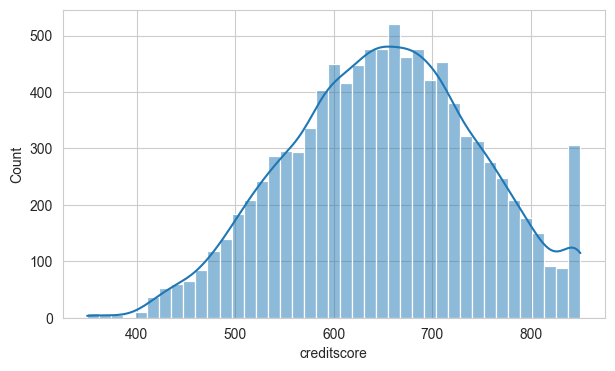

In [16]:
sns.histplot(x = "creditscore", data = df, kde=True);

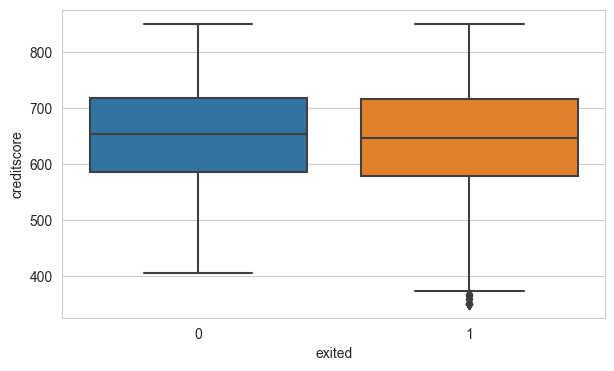

In [17]:
sns.boxplot(x = df.exited, y =df.creditscore);

## Geography

In [18]:
df.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

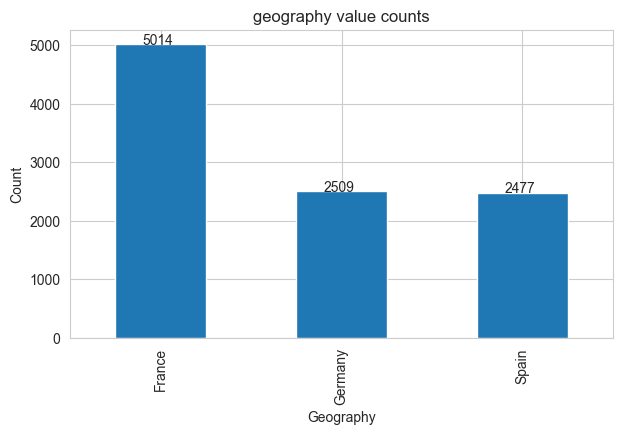

In [19]:
ax = df.geography.value_counts().plot(kind="bar")
ax.set_xlabel("Geography")
ax.set_ylabel("Count")
ax.set_title("geography value counts")
for i, v in enumerate(df.geography.value_counts()):
    ax.text(i - 0.1, v + 0.5, str(v))
plt.show()

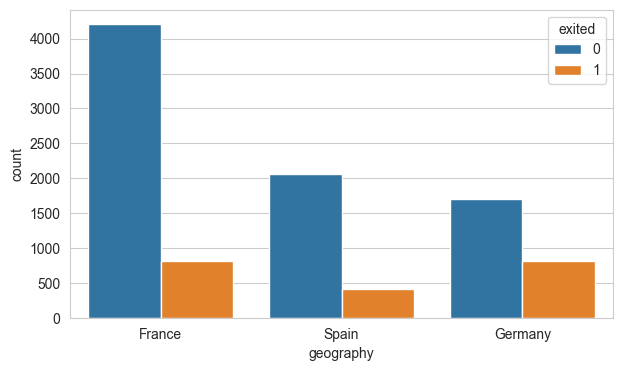

In [20]:
sns.countplot(x = "geography", data = df ,hue= "exited");

In [21]:
df.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

## Gender

In [22]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [23]:
df.groupby(["gender"])["exited"].value_counts(normalize=True)

gender  exited
Female  0        0.749
        1        0.251
Male    0        0.835
        1        0.165
Name: exited, dtype: float64

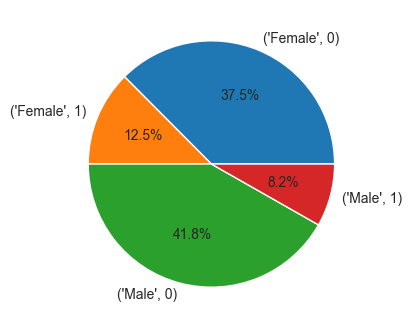

In [24]:
fig, ax = plt.subplots()
ax.pie(df.groupby(["gender"])["exited"].value_counts(normalize=True), labels=df.groupby(["gender"])["exited"].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.show()

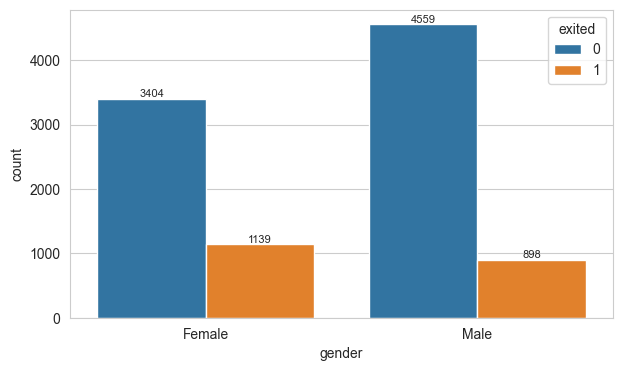

In [25]:
grouped_df = df.groupby(["gender"])["exited"].value_counts().reset_index(name="count")
ax = sns.barplot(x="gender", y="count", hue="exited", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [26]:
df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1])

## Age

In [27]:
df.age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

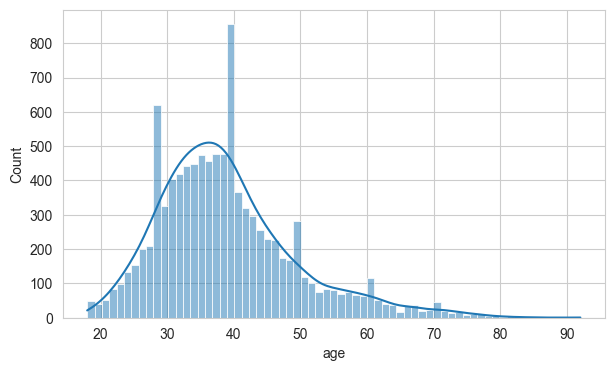

In [28]:
sns.histplot(x = "age", data = df, kde=True);

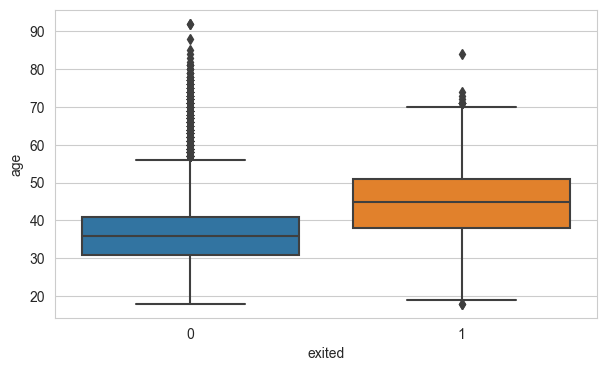

In [29]:
sns.boxplot(x = "exited", y ="age", data = df);

## Tenure

In [30]:
df.tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

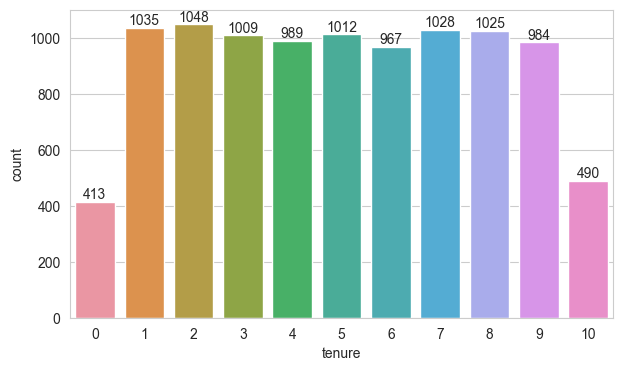

In [31]:
ax = sns.countplot(x = "tenure", data = df)
ax.bar_label(ax.containers[0]);

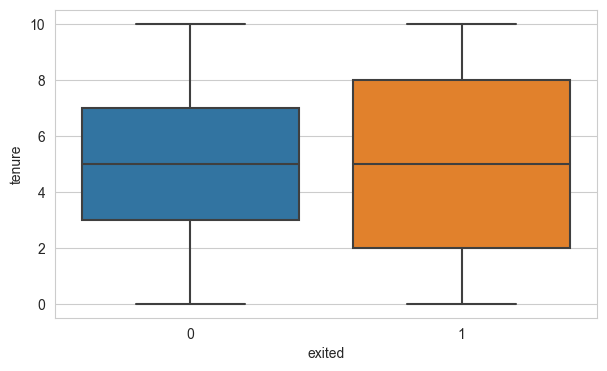

In [32]:
sns.boxplot(x = "exited", y = "tenure", data = df);

## Balance

In [33]:
df.balance.value_counts()

0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: balance, Length: 6382, dtype: int64

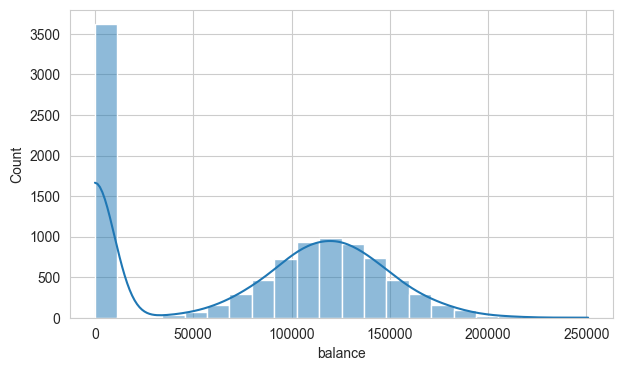

In [34]:
sns.histplot(x = "balance", data = df, kde=True);

## Number of Products

In [35]:
df.numofproducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: numofproducts, dtype: int64

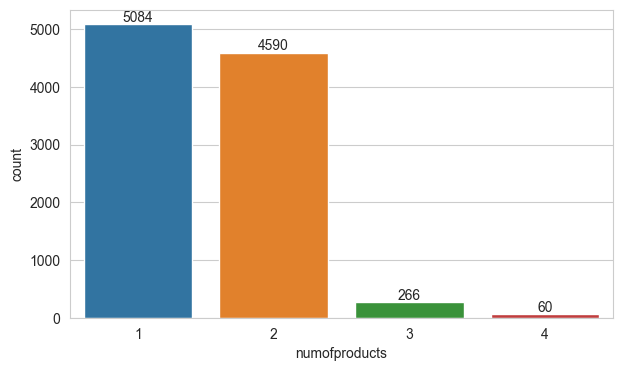

In [36]:
ax = sns.countplot(x = "numofproducts", data = df)
ax.bar_label(ax.containers[0]);

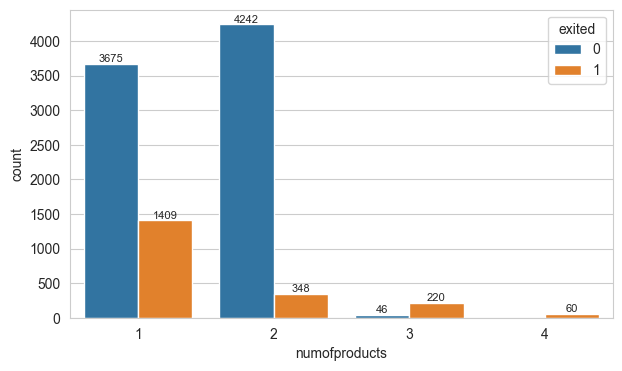

In [37]:
grouped_df = df.groupby(["numofproducts"])["exited"].value_counts().reset_index(name="count")
ax = sns.barplot(x="numofproducts", y="count", hue="exited", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [38]:
df.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

## Has Credit Card?

In [39]:
df.hascrcard.value_counts()

1    7055
0    2945
Name: hascrcard, dtype: int64

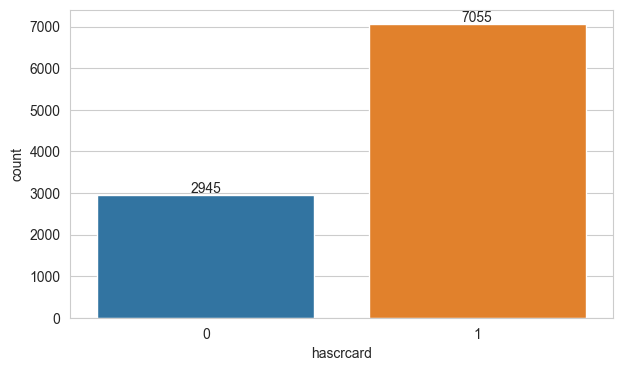

In [40]:
ax = sns.countplot(x = "hascrcard", data = df)
ax.bar_label(ax.containers[0]);

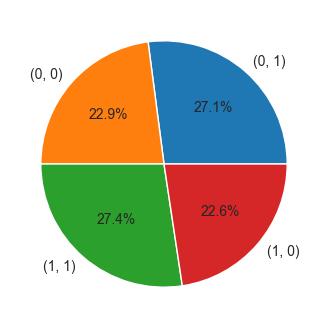

In [41]:
fig, ax = plt.subplots()
ax.pie(df.groupby(["hascrcard"])["gender"].value_counts(normalize=True), labels=df.groupby(["hascrcard"])["gender"].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.show()

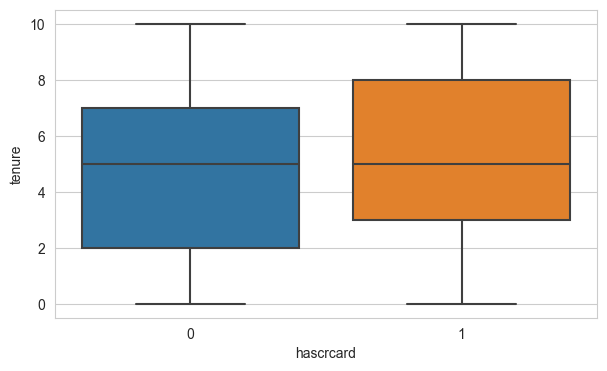

In [42]:
sns.boxplot(x = "hascrcard", y = "tenure", data = df);

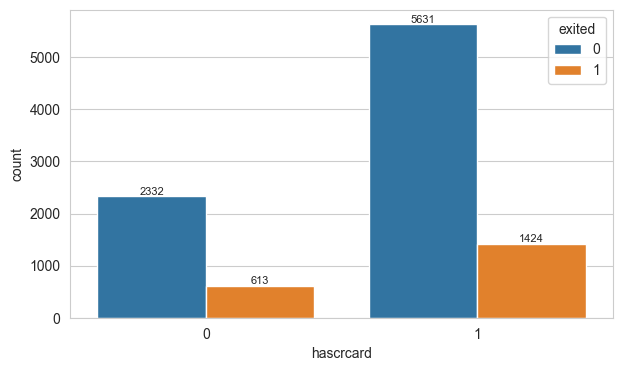

In [43]:
grouped_df = df.groupby(["hascrcard"])["exited"].value_counts().reset_index(name="count")
ax = sns.barplot(x="hascrcard", y="count", hue="exited", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [44]:
df.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

## Is Active Member?

In [45]:
df.isactivemember.value_counts()

1    5151
0    4849
Name: isactivemember, dtype: int64

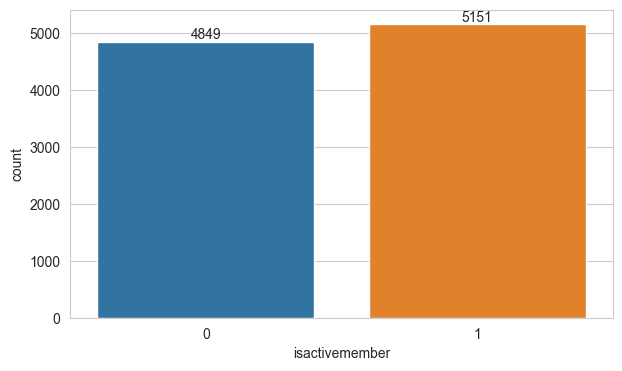

In [46]:
ax = sns.countplot(x = "isactivemember", data = df)
ax.bar_label(ax.containers[0]);

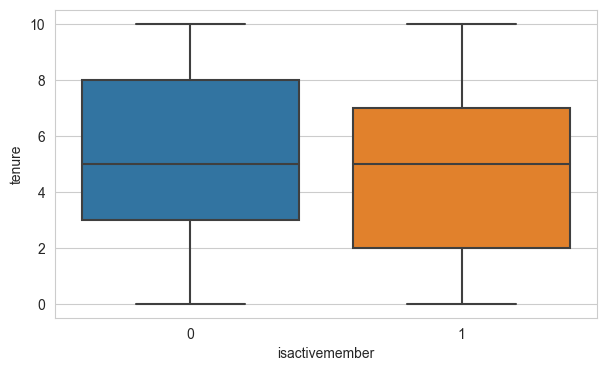

In [47]:
sns.boxplot(x = "isactivemember", y = "tenure", data = df);

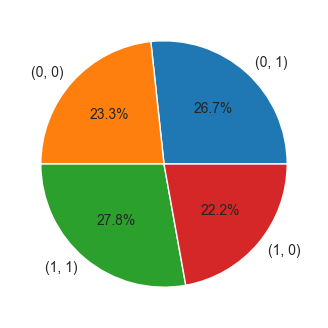

In [48]:
fig, ax = plt.subplots()
ax.pie(df.groupby(["isactivemember"])["gender"].value_counts(normalize=True), 
       labels=df.groupby(["isactivemember"])["gender"].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.show()

In [49]:
df.groupby(["isactivemember"])["exited"].value_counts()

isactivemember  exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: exited, dtype: int64

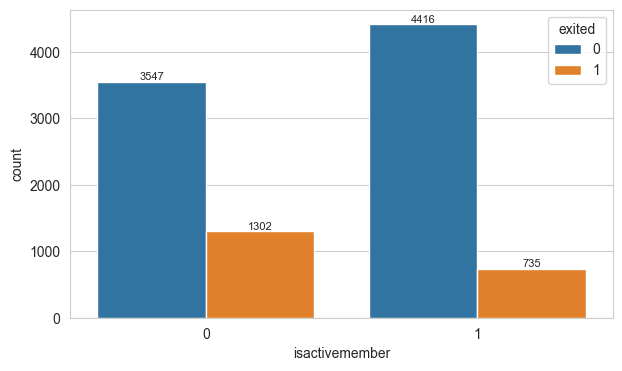

In [50]:
grouped_df = df.groupby(["isactivemember"])["exited"].value_counts().reset_index(name="count")
ax = sns.barplot(x="isactivemember", y="count", hue="exited", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [51]:
df.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

## Estimated Salary

In [52]:
df.estimatedsalary.value_counts()

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: estimatedsalary, Length: 9999, dtype: int64

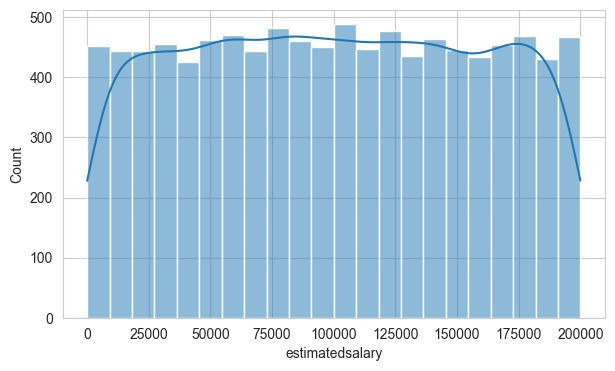

In [53]:
sns.histplot(x = "estimatedsalary", data = df, kde=True);

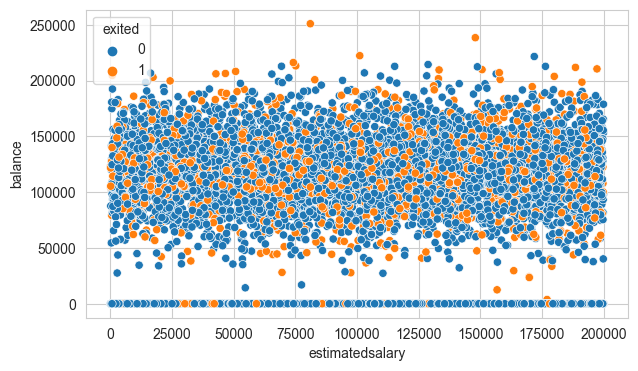

In [54]:
sns.scatterplot(x = "estimatedsalary", y = "balance", data = df, hue = "exited");

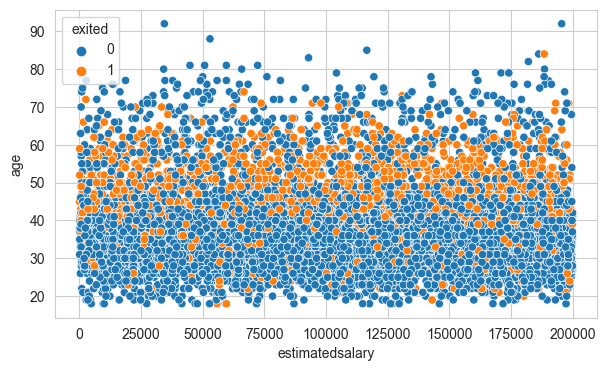

In [55]:
sns.scatterplot(x = "estimatedsalary", y = "age", data = df, hue = "exited");

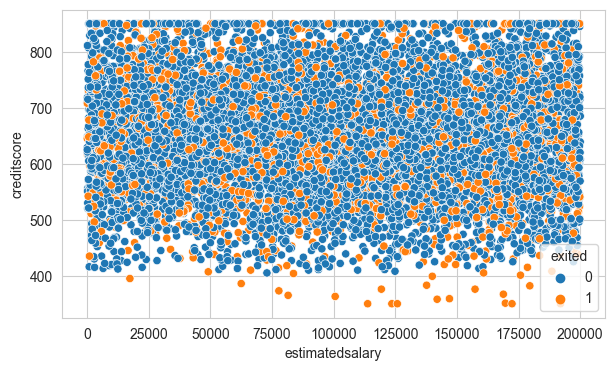

In [56]:
sns.scatterplot(x = "estimatedsalary", y = "creditscore", data = df, hue = "exited");

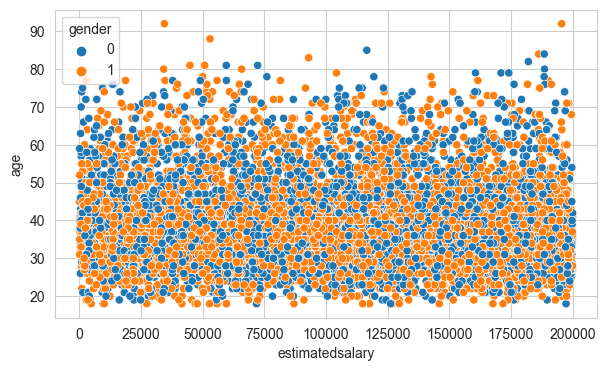

In [57]:
sns.scatterplot(x = "estimatedsalary", y = "age", data = df, hue = "gender");

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surname          10000 non-null  object 
 1   creditscore      10000 non-null  int64  
 2   geography        10000 non-null  object 
 3   gender           10000 non-null  int64  
 4   age              10000 non-null  int64  
 5   tenure           10000 non-null  int64  
 6   balance          10000 non-null  float64
 7   numofproducts    10000 non-null  int64  
 8   hascrcard        10000 non-null  int64  
 9   isactivemember   10000 non-null  int64  
 10  estimatedsalary  10000 non-null  float64
 11  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
creditscore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
gender,10000.000,0.546,0.498,0.000,0.000,1.000,1.000,1.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
numofproducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
hascrcard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
isactivemember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimatedsalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [60]:
df.drop("surname", axis = 1, inplace = True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  int64  
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [62]:
df = pd.get_dummies(df, prefix=['geo'],columns=['geography'])

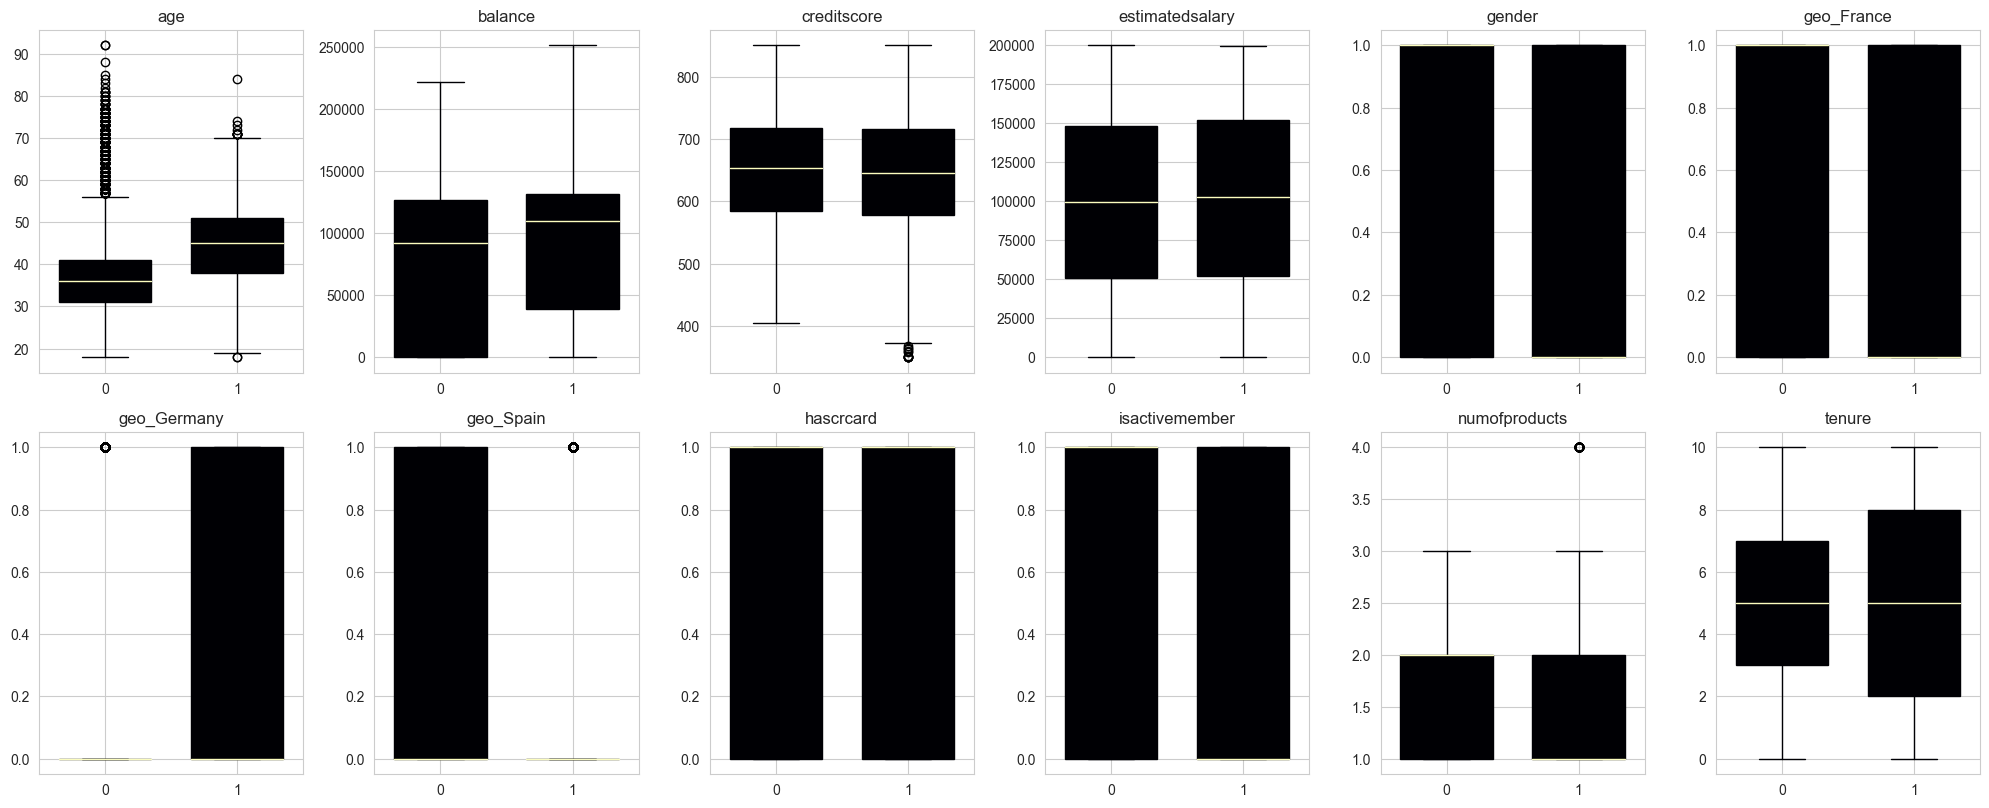

In [63]:
df.plot(kind="box",
        by= "exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

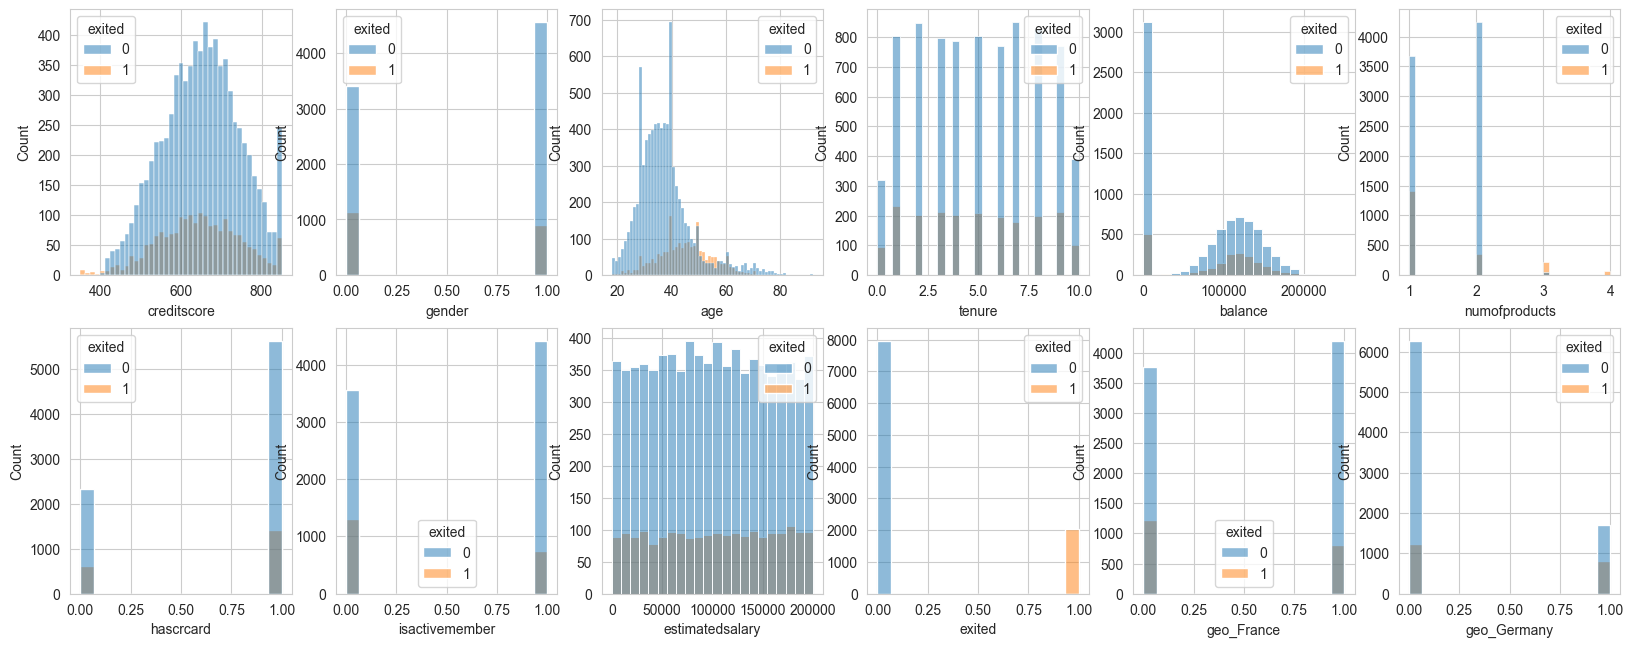

In [64]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='exited')

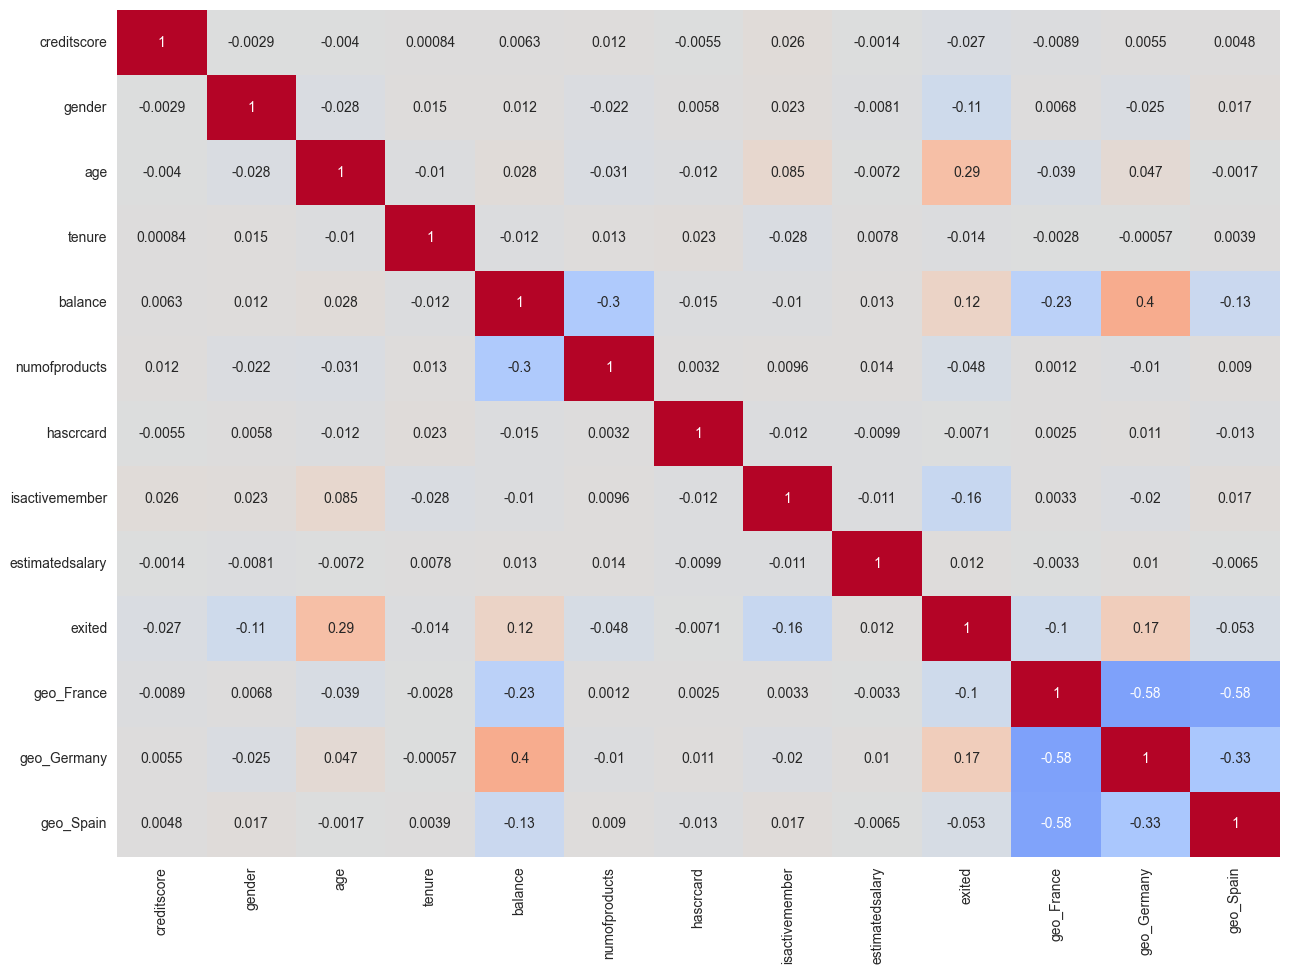

In [65]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

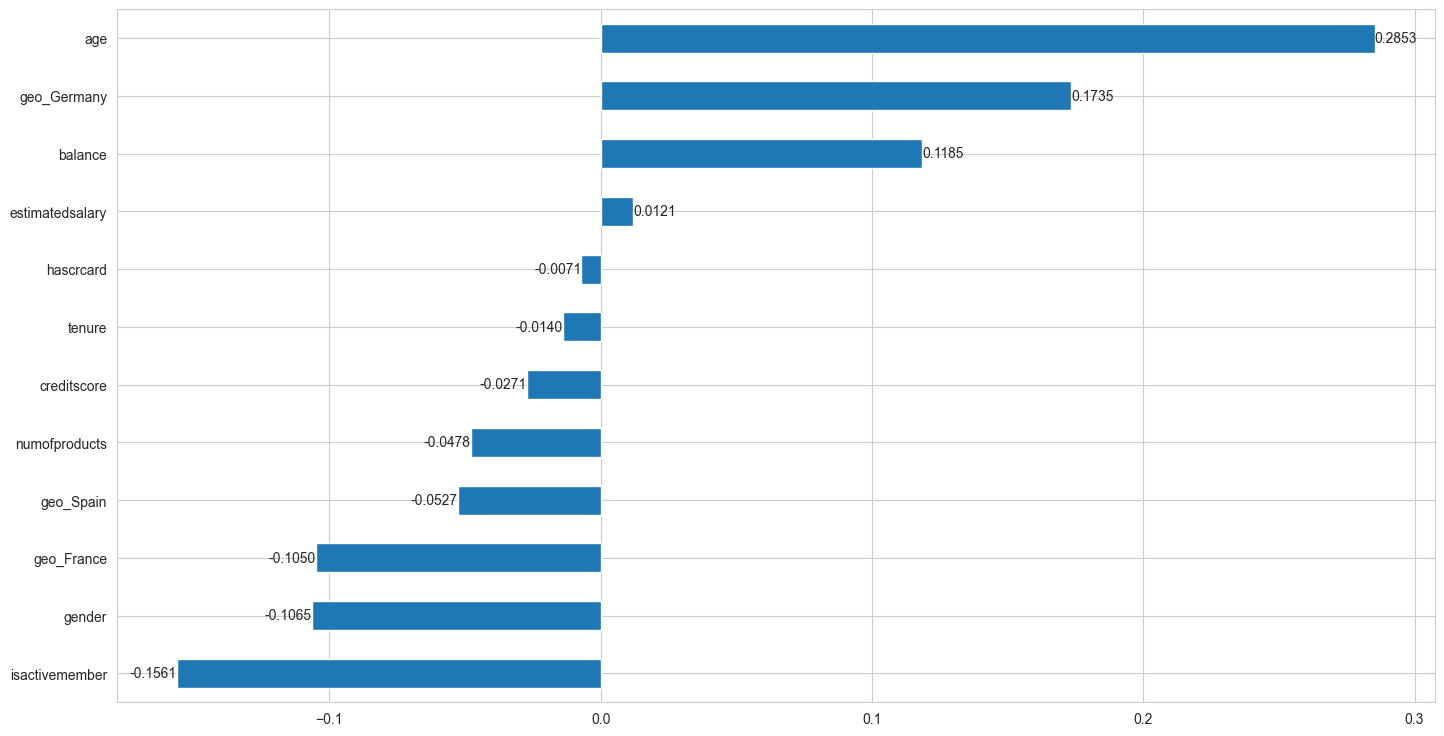

In [66]:
plt.figure(figsize=(17, 9))
ax = df.corr()["exited"].sort_values().drop("exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [68]:
X = df.drop('exited', axis=1)
y = df['exited']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [70]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.2, random_state=42 
)

In [71]:
scaler = MinMaxScaler()

In [72]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [74]:
X_train.shape

(6400, 12)

In [75]:
X_val.shape

(1600, 12)

In [76]:
X_test.shape

(2000, 12)

In [77]:
tf.keras.utils.set_random_seed(42)

In [88]:
model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [89]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                234       
                                                                 
 dense_5 (Dense)             (None, 9)                 171       
                                                                 
 dense_6 (Dense)             (None, 4)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(12, 18) dtype=float32, numpy=
 array([[ 0.4433155 , -0.27434886,  0.29096043, -0.40442055,  0.17145509,
         -0.3853159 , -0.2121993 , -0.43754715,  0.27091736, -0.39438662,
          0.17959249,  0.1950919 , -0.15501395,  0.17971343, -0.09476253,
         -0.1298348 ,  0.1377365 , -0.3450492 ],
        [-0.08740687,  0.26200682, -0.09104723,  0.14050901,  0.02273479,
         -0.3502547 , -0.20511872, -0.05095029, -0.04846457,  0.0095388 ,
          0.02340025,  0.4438699 , -0.03100979, -0.08692214,  0.00691029,
          0.04727539,  0.38741577, -0.0453085 ],
        [ 0.16533983,  0.14521426, -0.36306068,  0.34460235, -0.31543365,
         -0.02964756, -0.23588146,  0.3074361 , -0.3444229 ,  0.40501863,
          0.0015018 , -0.3637402 , -0.1721943 ,  0.2526433 , -0.08952388,
          0.43273115,  0.0931043 ,  0.16883361],
        [-0.4137105 , -0.16769123, -0.10466   , -0.3034378 , -0.3132692 ,
          0.10331208, -0.19321585,  0.09860

In [92]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 75, 
          epochs=500,
          verbose=1)

Epoch 1/500
86/86 [==============================] - 2s 5ms/step - loss: 0.6707 - recall: 0.1265 - val_loss: 0.6211 - val_recall: 0.0000e+00
Epoch 2/500
86/86 [==============================] - 0s 2ms/step - loss: 0.5369 - recall: 0.0000e+00 - val_loss: 0.4915 - val_recall: 0.0000e+00
Epoch 3/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4815 - recall: 0.0000e+00 - val_loss: 0.4693 - val_recall: 0.0000e+00
Epoch 4/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4670 - recall: 0.0069 - val_loss: 0.4587 - val_recall: 0.0184
Epoch 5/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4558 - recall: 0.0414 - val_loss: 0.4533 - val_recall: 0.0245
Epoch 6/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4481 - recall: 0.0951 - val_loss: 0.4454 - val_recall: 0.0859
Epoch 7/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4393 - recall: 0.1281 - val_loss: 0.4403 - val_recall: 0.1227
Epoch 8/500
86/86 [==

86/86 [==============================] - 0s 3ms/step - loss: 0.3356 - recall: 0.4517 - val_loss: 0.3591 - val_recall: 0.4080
Epoch 61/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3369 - recall: 0.4586 - val_loss: 0.3600 - val_recall: 0.4448
Epoch 62/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3390 - recall: 0.4548 - val_loss: 0.3591 - val_recall: 0.4356
Epoch 63/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3368 - recall: 0.4517 - val_loss: 0.3570 - val_recall: 0.4172
Epoch 64/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3370 - recall: 0.4540 - val_loss: 0.3614 - val_recall: 0.4448
Epoch 65/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3390 - recall: 0.4670 - val_loss: 0.3613 - val_recall: 0.3681
Epoch 66/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3361 - recall: 0.4525 - val_loss: 0.3589 - val_recall: 0.4417
Epoch 67/500
86/86 [===========================

86/86 [==============================] - 0s 4ms/step - loss: 0.3316 - recall: 0.4824 - val_loss: 0.3617 - val_recall: 0.3865
Epoch 120/500
86/86 [==============================] - 0s 5ms/step - loss: 0.3288 - recall: 0.4762 - val_loss: 0.3620 - val_recall: 0.4018
Epoch 121/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3288 - recall: 0.4693 - val_loss: 0.3608 - val_recall: 0.3957
Epoch 122/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3289 - recall: 0.4816 - val_loss: 0.3661 - val_recall: 0.3589
Epoch 123/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3297 - recall: 0.4739 - val_loss: 0.3620 - val_recall: 0.3865
Epoch 124/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3296 - recall: 0.4647 - val_loss: 0.3585 - val_recall: 0.4141
Epoch 125/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3297 - recall: 0.4762 - val_loss: 0.3643 - val_recall: 0.3834
Epoch 126/500
86/86 [====================

86/86 [==============================] - 0s 4ms/step - loss: 0.3277 - recall: 0.4954 - val_loss: 0.3638 - val_recall: 0.4571
Epoch 179/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3267 - recall: 0.4831 - val_loss: 0.3649 - val_recall: 0.3988
Epoch 180/500
86/86 [==============================] - 0s 4ms/step - loss: 0.3255 - recall: 0.4916 - val_loss: 0.3643 - val_recall: 0.3926
Epoch 181/500
86/86 [==============================] - 0s 4ms/step - loss: 0.3245 - recall: 0.4808 - val_loss: 0.3635 - val_recall: 0.4110
Epoch 182/500
86/86 [==============================] - 0s 4ms/step - loss: 0.3264 - recall: 0.4893 - val_loss: 0.3641 - val_recall: 0.4509
Epoch 183/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3244 - recall: 0.4824 - val_loss: 0.3679 - val_recall: 0.4294
Epoch 184/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3246 - recall: 0.4985 - val_loss: 0.3653 - val_recall: 0.4540
Epoch 185/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.3211 - recall: 0.4954 - val_loss: 0.3640 - val_recall: 0.4294
Epoch 238/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3211 - recall: 0.4992 - val_loss: 0.3721 - val_recall: 0.4693
Epoch 239/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3221 - recall: 0.4916 - val_loss: 0.3654 - val_recall: 0.4233
Epoch 240/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3232 - recall: 0.5023 - val_loss: 0.3670 - val_recall: 0.4387
Epoch 241/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3207 - recall: 0.4946 - val_loss: 0.3662 - val_recall: 0.4540
Epoch 242/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3217 - recall: 0.4954 - val_loss: 0.3644 - val_recall: 0.4632
Epoch 243/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3223 - recall: 0.4931 - val_loss: 0.3660 - val_recall: 0.4202
Epoch 244/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.3207 - recall: 0.5054 - val_loss: 0.3658 - val_recall: 0.4448
Epoch 297/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3212 - recall: 0.4923 - val_loss: 0.3664 - val_recall: 0.4755
Epoch 298/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.4962 - val_loss: 0.3675 - val_recall: 0.3988
Epoch 299/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3190 - recall: 0.5023 - val_loss: 0.3649 - val_recall: 0.4540
Epoch 300/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3188 - recall: 0.4954 - val_loss: 0.3676 - val_recall: 0.4908
Epoch 301/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3199 - recall: 0.5077 - val_loss: 0.3661 - val_recall: 0.4325
Epoch 302/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3184 - recall: 0.4969 - val_loss: 0.3690 - val_recall: 0.4325
Epoch 303/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.3171 - recall: 0.4985 - val_loss: 0.3685 - val_recall: 0.4571
Epoch 356/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3181 - recall: 0.5031 - val_loss: 0.3664 - val_recall: 0.4325
Epoch 357/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3179 - recall: 0.4992 - val_loss: 0.3682 - val_recall: 0.4755
Epoch 358/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3178 - recall: 0.4946 - val_loss: 0.3644 - val_recall: 0.4571
Epoch 359/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3167 - recall: 0.5130 - val_loss: 0.3718 - val_recall: 0.4785
Epoch 360/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3180 - recall: 0.5038 - val_loss: 0.3710 - val_recall: 0.3988
Epoch 361/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3161 - recall: 0.5015 - val_loss: 0.3708 - val_recall: 0.4663
Epoch 362/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.3178 - recall: 0.5008 - val_loss: 0.3648 - val_recall: 0.4724
Epoch 415/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.5199 - val_loss: 0.3656 - val_recall: 0.4540
Epoch 416/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3131 - recall: 0.5123 - val_loss: 0.3647 - val_recall: 0.4755
Epoch 417/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3148 - recall: 0.5069 - val_loss: 0.3686 - val_recall: 0.4509
Epoch 418/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3132 - recall: 0.5107 - val_loss: 0.3714 - val_recall: 0.4110
Epoch 419/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3147 - recall: 0.5069 - val_loss: 0.3711 - val_recall: 0.4356
Epoch 420/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3137 - recall: 0.5184 - val_loss: 0.3670 - val_recall: 0.4141
Epoch 421/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.3115 - recall: 0.5176 - val_loss: 0.3807 - val_recall: 0.5031
Epoch 474/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3116 - recall: 0.5176 - val_loss: 0.3676 - val_recall: 0.4540
Epoch 475/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3108 - recall: 0.5207 - val_loss: 0.3669 - val_recall: 0.4417
Epoch 476/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3119 - recall: 0.5153 - val_loss: 0.3712 - val_recall: 0.4018
Epoch 477/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3111 - recall: 0.5176 - val_loss: 0.3774 - val_recall: 0.4018
Epoch 478/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3120 - recall: 0.5169 - val_loss: 0.3678 - val_recall: 0.4571
Epoch 479/500
86/86 [==============================] - 0s 5ms/step - loss: 0.3111 - recall: 0.5284 - val_loss: 0.3712 - val_recall: 0.4110
Epoch 480/500
86/86 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [93]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.671,0.127,0.621,0.000
1,0.537,0.000,0.491,0.000
2,0.481,0.000,0.469,0.000
3,0.467,0.007,0.459,0.018
4,0.456,0.041,0.453,0.025


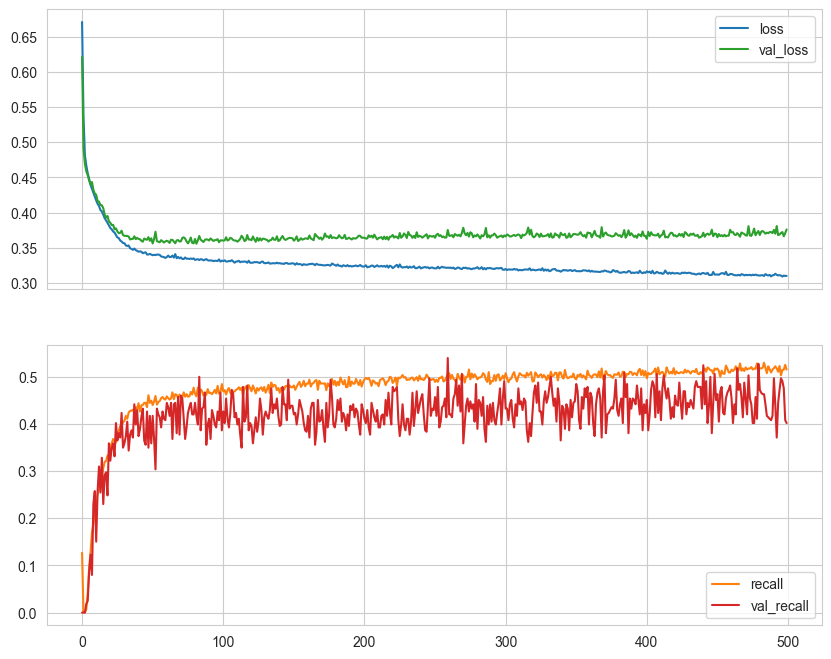

In [95]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [96]:
model.evaluate(X_test, y_test, verbose=0)

[0.35124966502189636, 0.44717445969581604]

In [97]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.35124966502189636
recall :  0.44717445969581604


In [98]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1532   61]
 [ 225  182]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [99]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

63/63 [==============================] - 0s 1ms/step


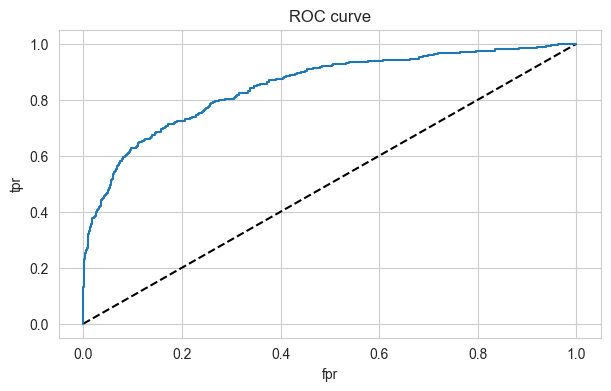

In [100]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [101]:
roc_auc_score(y_test, y_pred_proba)

0.8483043906772721

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [102]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [103]:
from sklearn.utils import class_weight

In [104]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [105]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 75, 
          epochs=500,
          verbose=1,
         class_weight=class_weights
         )

Epoch 1/500
86/86 [==============================] - 2s 5ms/step - loss: 0.6897 - recall: 0.0537 - val_loss: 0.6593 - val_recall: 0.1963
Epoch 2/500
86/86 [==============================] - 0s 3ms/step - loss: 0.6789 - recall: 0.3328 - val_loss: 0.6301 - val_recall: 0.4479
Epoch 3/500
86/86 [==============================] - 0s 3ms/step - loss: 0.6654 - recall: 0.4271 - val_loss: 0.5913 - val_recall: 0.4969
Epoch 4/500
86/86 [==============================] - 0s 2ms/step - loss: 0.6527 - recall: 0.5422 - val_loss: 0.5929 - val_recall: 0.6135
Epoch 5/500
86/86 [==============================] - 0s 2ms/step - loss: 0.6413 - recall: 0.6066 - val_loss: 0.5557 - val_recall: 0.5644
Epoch 6/500
86/86 [==============================] - 0s 3ms/step - loss: 0.6333 - recall: 0.6587 - val_loss: 0.5535 - val_recall: 0.6012
Epoch 7/500
86/86 [==============================] - 0s 3ms/step - loss: 0.6224 - recall: 0.6626 - val_loss: 0.5545 - val_recall: 0.6227
Epoch 8/500
86/86 [======================

86/86 [==============================] - 0s 2ms/step - loss: 0.4564 - recall: 0.7914 - val_loss: 0.4609 - val_recall: 0.7423
Epoch 61/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4572 - recall: 0.7814 - val_loss: 0.4715 - val_recall: 0.7485
Epoch 62/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4564 - recall: 0.7876 - val_loss: 0.5019 - val_recall: 0.7791
Epoch 63/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4559 - recall: 0.7906 - val_loss: 0.4662 - val_recall: 0.7454
Epoch 64/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4552 - recall: 0.7891 - val_loss: 0.4747 - val_recall: 0.7485
Epoch 65/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4567 - recall: 0.7998 - val_loss: 0.4473 - val_recall: 0.7270
Epoch 66/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4532 - recall: 0.7883 - val_loss: 0.4920 - val_recall: 0.7853
Epoch 67/500
86/86 [===========================

86/86 [==============================] - 0s 3ms/step - loss: 0.4442 - recall: 0.7960 - val_loss: 0.4637 - val_recall: 0.7454
Epoch 120/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4390 - recall: 0.7983 - val_loss: 0.4342 - val_recall: 0.7209
Epoch 121/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4391 - recall: 0.7983 - val_loss: 0.4394 - val_recall: 0.7209
Epoch 122/500
86/86 [==============================] - 1s 6ms/step - loss: 0.4371 - recall: 0.7960 - val_loss: 0.4234 - val_recall: 0.7025
Epoch 123/500
86/86 [==============================] - 0s 5ms/step - loss: 0.4397 - recall: 0.7975 - val_loss: 0.4504 - val_recall: 0.7331
Epoch 124/500
86/86 [==============================] - 0s 5ms/step - loss: 0.4403 - recall: 0.7876 - val_loss: 0.4451 - val_recall: 0.7331
Epoch 125/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4400 - recall: 0.7960 - val_loss: 0.4521 - val_recall: 0.7393
Epoch 126/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.4303 - recall: 0.8037 - val_loss: 0.4655 - val_recall: 0.7638
Epoch 179/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4297 - recall: 0.8052 - val_loss: 0.4392 - val_recall: 0.7025
Epoch 180/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4264 - recall: 0.7998 - val_loss: 0.4596 - val_recall: 0.7362
Epoch 181/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4271 - recall: 0.8014 - val_loss: 0.4584 - val_recall: 0.7454
Epoch 182/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4287 - recall: 0.8014 - val_loss: 0.4571 - val_recall: 0.7331
Epoch 183/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4273 - recall: 0.8083 - val_loss: 0.4463 - val_recall: 0.7147
Epoch 184/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4254 - recall: 0.7952 - val_loss: 0.5107 - val_recall: 0.7945
Epoch 185/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.4185 - recall: 0.8060 - val_loss: 0.4367 - val_recall: 0.7086
Epoch 238/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4176 - recall: 0.8090 - val_loss: 0.5157 - val_recall: 0.7853
Epoch 239/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4209 - recall: 0.8060 - val_loss: 0.4626 - val_recall: 0.7301
Epoch 240/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4199 - recall: 0.8075 - val_loss: 0.4975 - val_recall: 0.7914
Epoch 241/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4187 - recall: 0.8198 - val_loss: 0.4582 - val_recall: 0.7485
Epoch 242/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4207 - recall: 0.8113 - val_loss: 0.4590 - val_recall: 0.7393
Epoch 243/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4187 - recall: 0.8083 - val_loss: 0.4562 - val_recall: 0.7117
Epoch 244/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.4143 - recall: 0.8190 - val_loss: 0.4604 - val_recall: 0.7209
Epoch 297/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4155 - recall: 0.8021 - val_loss: 0.4846 - val_recall: 0.7546
Epoch 298/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4176 - recall: 0.8121 - val_loss: 0.4348 - val_recall: 0.6840
Epoch 299/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4127 - recall: 0.8113 - val_loss: 0.4480 - val_recall: 0.7178
Epoch 300/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4118 - recall: 0.8113 - val_loss: 0.5150 - val_recall: 0.7853
Epoch 301/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4138 - recall: 0.8229 - val_loss: 0.4632 - val_recall: 0.7393
Epoch 302/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4121 - recall: 0.8137 - val_loss: 0.4814 - val_recall: 0.7515
Epoch 303/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.4070 - recall: 0.8198 - val_loss: 0.4689 - val_recall: 0.7239
Epoch 356/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4062 - recall: 0.8144 - val_loss: 0.4623 - val_recall: 0.7147
Epoch 357/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4094 - recall: 0.8152 - val_loss: 0.4715 - val_recall: 0.7270
Epoch 358/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4068 - recall: 0.8236 - val_loss: 0.4573 - val_recall: 0.7270
Epoch 359/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4058 - recall: 0.8137 - val_loss: 0.4766 - val_recall: 0.7362
Epoch 360/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4067 - recall: 0.8213 - val_loss: 0.4614 - val_recall: 0.7117
Epoch 361/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4065 - recall: 0.8183 - val_loss: 0.4764 - val_recall: 0.7423
Epoch 362/500
86/86 [====================

86/86 [==============================] - 0s 3ms/step - loss: 0.4068 - recall: 0.8144 - val_loss: 0.5090 - val_recall: 0.7761
Epoch 415/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4039 - recall: 0.8213 - val_loss: 0.4788 - val_recall: 0.7362
Epoch 416/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4038 - recall: 0.8121 - val_loss: 0.4869 - val_recall: 0.7577
Epoch 417/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4040 - recall: 0.8198 - val_loss: 0.4972 - val_recall: 0.7423
Epoch 418/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4055 - recall: 0.8160 - val_loss: 0.4762 - val_recall: 0.7239
Epoch 419/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4039 - recall: 0.8198 - val_loss: 0.4780 - val_recall: 0.7239
Epoch 420/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4036 - recall: 0.8190 - val_loss: 0.4663 - val_recall: 0.7178
Epoch 421/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.3994 - recall: 0.8137 - val_loss: 0.5111 - val_recall: 0.7577
Epoch 474/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3985 - recall: 0.8198 - val_loss: 0.4804 - val_recall: 0.7423
Epoch 475/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3986 - recall: 0.8206 - val_loss: 0.4930 - val_recall: 0.7638
Epoch 476/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4000 - recall: 0.8152 - val_loss: 0.4753 - val_recall: 0.7239
Epoch 477/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4007 - recall: 0.8190 - val_loss: 0.4731 - val_recall: 0.7086
Epoch 478/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4006 - recall: 0.8190 - val_loss: 0.5130 - val_recall: 0.7669
Epoch 479/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4003 - recall: 0.8252 - val_loss: 0.4896 - val_recall: 0.7362
Epoch 480/500
86/86 [====================

In [106]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.690,0.054,0.659,0.196
1,0.679,0.333,0.630,0.448
2,0.665,0.427,0.591,0.497
3,0.653,0.542,0.593,0.613
4,0.641,0.607,0.556,0.564


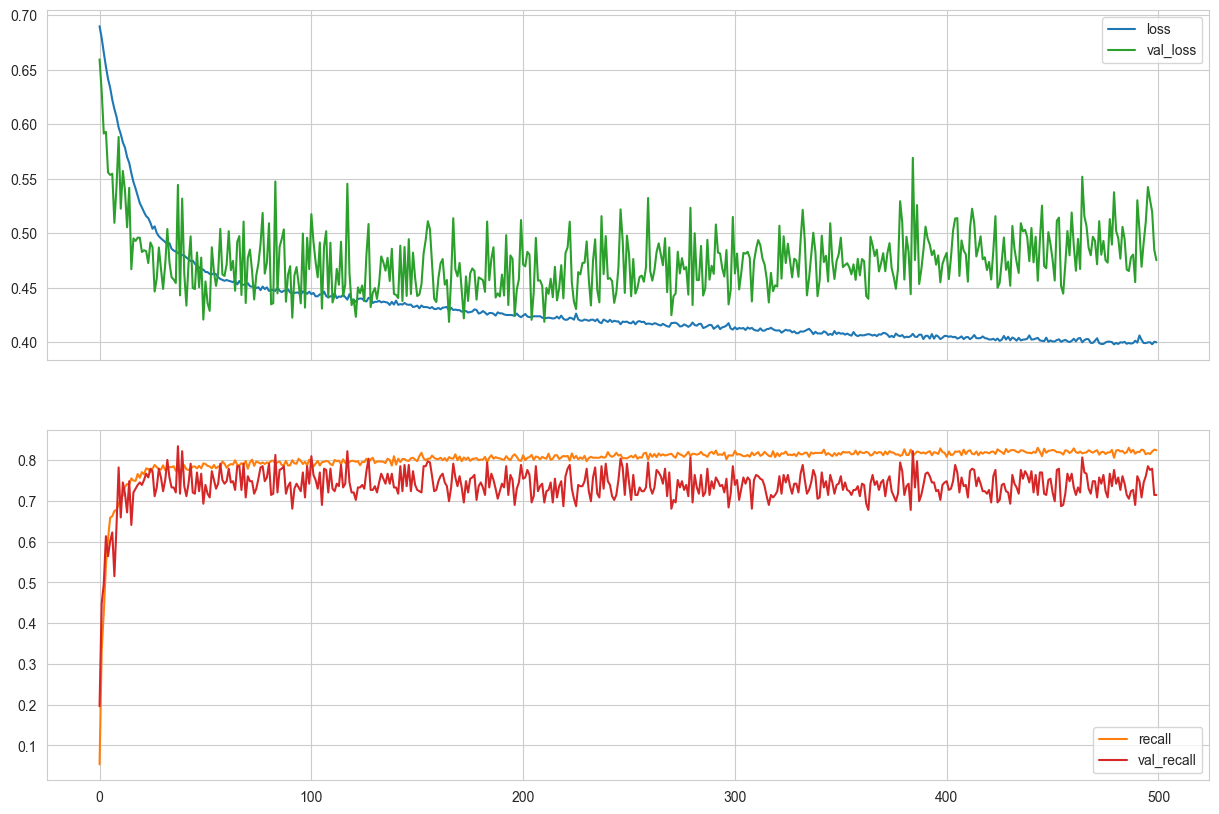

In [107]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [108]:
model.evaluate(X_test, y_test, verbose=0)

[0.47490450739860535, 0.7199017405509949]

In [109]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.47490450739860535
recall :  0.44717445969581604


In [110]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1281  312]
 [ 114  293]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



63/63 [==============================] - 0s 1ms/step


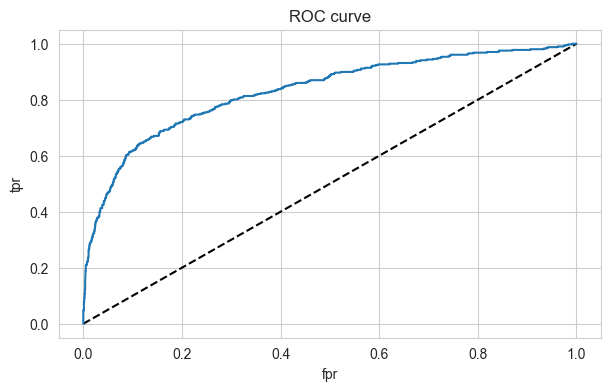

In [111]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [112]:
roc_auc_score(y_test, y_pred_proba)

0.8310845514235345

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [114]:
from tensorflow.keras.optimizers import Adam

In [115]:
tf.keras.utils.set_random_seed(42)


model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.003)

In [116]:
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [117]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 75, 
          epochs=500,
          verbose=1)

Epoch 1/500
86/86 [==============================] - 2s 6ms/step - loss: 0.6477 - recall: 0.1373 - val_loss: 0.5359 - val_recall: 0.0000e+00
Epoch 2/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4841 - recall: 0.0000e+00 - val_loss: 0.4653 - val_recall: 0.0000e+00
Epoch 3/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4591 - recall: 0.0000e+00 - val_loss: 0.4543 - val_recall: 0.0000e+00
Epoch 4/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4488 - recall: 0.0000e+00 - val_loss: 0.4420 - val_recall: 0.0000e+00
Epoch 5/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4349 - recall: 0.1135 - val_loss: 0.4297 - val_recall: 0.2791
Epoch 6/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4227 - recall: 0.2492 - val_loss: 0.4192 - val_recall: 0.2454
Epoch 7/500
86/86 [==============================] - 0s 2ms/step - loss: 0.4163 - recall: 0.2638 - val_loss: 0.4128 - val_recall: 0.2362
Epoch 8/500
8

86/86 [==============================] - 0s 2ms/step - loss: 0.3235 - recall: 0.4747 - val_loss: 0.3588 - val_recall: 0.4202
Epoch 61/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3243 - recall: 0.4686 - val_loss: 0.3711 - val_recall: 0.4908
Epoch 62/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3281 - recall: 0.4632 - val_loss: 0.3656 - val_recall: 0.4571
Epoch 63/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3248 - recall: 0.4739 - val_loss: 0.3634 - val_recall: 0.4018
Epoch 64/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3246 - recall: 0.4709 - val_loss: 0.3636 - val_recall: 0.4785
Epoch 65/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3250 - recall: 0.4839 - val_loss: 0.3638 - val_recall: 0.3650
Epoch 66/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3244 - recall: 0.4762 - val_loss: 0.3603 - val_recall: 0.4202
Epoch 67/500
86/86 [===========================

86/86 [==============================] - 0s 4ms/step - loss: 0.3198 - recall: 0.4824 - val_loss: 0.3643 - val_recall: 0.4110
Epoch 120/500
86/86 [==============================] - 0s 5ms/step - loss: 0.3179 - recall: 0.4663 - val_loss: 0.3683 - val_recall: 0.3773
Epoch 121/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3183 - recall: 0.4732 - val_loss: 0.3721 - val_recall: 0.3988
Epoch 122/500
86/86 [==============================] - 0s 4ms/step - loss: 0.3174 - recall: 0.4801 - val_loss: 0.3757 - val_recall: 0.3589
Epoch 123/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3164 - recall: 0.4824 - val_loss: 0.3667 - val_recall: 0.3926
Epoch 124/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3185 - recall: 0.4739 - val_loss: 0.3641 - val_recall: 0.4571
Epoch 125/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3179 - recall: 0.4808 - val_loss: 0.3722 - val_recall: 0.3712
Epoch 126/500
86/86 [====================

86/86 [==============================] - 0s 3ms/step - loss: 0.3161 - recall: 0.4785 - val_loss: 0.3797 - val_recall: 0.4693
Epoch 179/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3149 - recall: 0.4693 - val_loss: 0.3703 - val_recall: 0.4233
Epoch 180/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3140 - recall: 0.4893 - val_loss: 0.3734 - val_recall: 0.4417
Epoch 181/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3121 - recall: 0.4808 - val_loss: 0.3763 - val_recall: 0.4387
Epoch 182/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3144 - recall: 0.4893 - val_loss: 0.3670 - val_recall: 0.4387
Epoch 183/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3136 - recall: 0.4716 - val_loss: 0.3784 - val_recall: 0.4571
Epoch 184/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3119 - recall: 0.4923 - val_loss: 0.3747 - val_recall: 0.4755
Epoch 185/500
86/86 [====================

86/86 [==============================] - 0s 3ms/step - loss: 0.3078 - recall: 0.4946 - val_loss: 0.3761 - val_recall: 0.3957
Epoch 238/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3098 - recall: 0.4862 - val_loss: 0.3775 - val_recall: 0.4325
Epoch 239/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3102 - recall: 0.4793 - val_loss: 0.3756 - val_recall: 0.4233
Epoch 240/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3107 - recall: 0.4923 - val_loss: 0.3755 - val_recall: 0.4141
Epoch 241/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3080 - recall: 0.4870 - val_loss: 0.3754 - val_recall: 0.4571
Epoch 242/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3085 - recall: 0.4923 - val_loss: 0.3878 - val_recall: 0.4755
Epoch 243/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3121 - recall: 0.4870 - val_loss: 0.3768 - val_recall: 0.4387
Epoch 244/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.3065 - recall: 0.4992 - val_loss: 0.3795 - val_recall: 0.4264
Epoch 297/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3073 - recall: 0.4870 - val_loss: 0.3840 - val_recall: 0.4509
Epoch 298/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3087 - recall: 0.5031 - val_loss: 0.3858 - val_recall: 0.3558
Epoch 299/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3078 - recall: 0.4900 - val_loss: 0.3758 - val_recall: 0.4479
Epoch 300/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3059 - recall: 0.5038 - val_loss: 0.3879 - val_recall: 0.4448
Epoch 301/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3064 - recall: 0.4939 - val_loss: 0.3823 - val_recall: 0.4110
Epoch 302/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3062 - recall: 0.5008 - val_loss: 0.3780 - val_recall: 0.4294
Epoch 303/500
86/86 [====================

86/86 [==============================] - 0s 3ms/step - loss: 0.3061 - recall: 0.4801 - val_loss: 0.3958 - val_recall: 0.4479
Epoch 356/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3052 - recall: 0.4946 - val_loss: 0.3905 - val_recall: 0.4202
Epoch 357/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3051 - recall: 0.4916 - val_loss: 0.4070 - val_recall: 0.4877
Epoch 358/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3060 - recall: 0.4900 - val_loss: 0.3978 - val_recall: 0.4018
Epoch 359/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3053 - recall: 0.4992 - val_loss: 0.3996 - val_recall: 0.4540
Epoch 360/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3049 - recall: 0.4939 - val_loss: 0.3890 - val_recall: 0.4049
Epoch 361/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3036 - recall: 0.4916 - val_loss: 0.3999 - val_recall: 0.4049
Epoch 362/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.3026 - recall: 0.5015 - val_loss: 0.3957 - val_recall: 0.4264
Epoch 415/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3004 - recall: 0.5046 - val_loss: 0.3983 - val_recall: 0.4049
Epoch 416/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3011 - recall: 0.4923 - val_loss: 0.3969 - val_recall: 0.4202
Epoch 417/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3024 - recall: 0.4885 - val_loss: 0.4041 - val_recall: 0.4080
Epoch 418/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3038 - recall: 0.5023 - val_loss: 0.4035 - val_recall: 0.4080
Epoch 419/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3028 - recall: 0.5008 - val_loss: 0.3981 - val_recall: 0.3896
Epoch 420/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3014 - recall: 0.5000 - val_loss: 0.4018 - val_recall: 0.4018
Epoch 421/500
86/86 [====================

86/86 [==============================] - 0s 3ms/step - loss: 0.3001 - recall: 0.5023 - val_loss: 0.4177 - val_recall: 0.4816
Epoch 474/500
86/86 [==============================] - 0s 3ms/step - loss: 0.2980 - recall: 0.5100 - val_loss: 0.4062 - val_recall: 0.4356
Epoch 475/500
86/86 [==============================] - 0s 3ms/step - loss: 0.2998 - recall: 0.4954 - val_loss: 0.4020 - val_recall: 0.4264
Epoch 476/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3005 - recall: 0.5161 - val_loss: 0.4077 - val_recall: 0.3896
Epoch 477/500
86/86 [==============================] - 0s 4ms/step - loss: 0.3009 - recall: 0.5130 - val_loss: 0.3988 - val_recall: 0.3988
Epoch 478/500
86/86 [==============================] - 0s 4ms/step - loss: 0.3013 - recall: 0.5077 - val_loss: 0.4090 - val_recall: 0.4264
Epoch 479/500
86/86 [==============================] - 0s 3ms/step - loss: 0.2995 - recall: 0.5100 - val_loss: 0.4090 - val_recall: 0.3834
Epoch 480/500
86/86 [====================

In [118]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.648,0.137,0.536,0.000
1,0.484,0.000,0.465,0.000
2,0.459,0.000,0.454,0.000
3,0.449,0.000,0.442,0.000
4,0.435,0.113,0.430,0.279


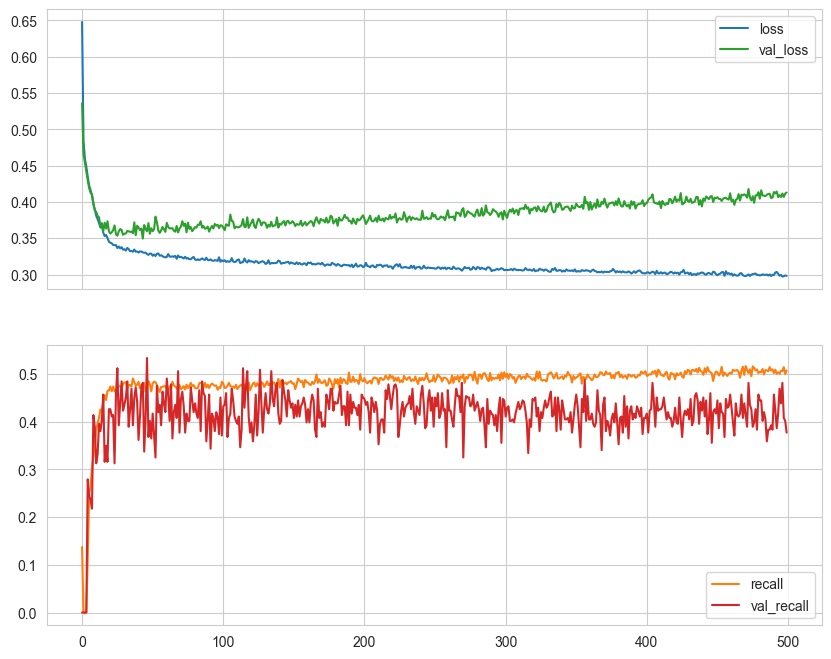

In [119]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [120]:
model.evaluate(X_test, y_test, verbose=0)

[0.37396520376205444, 0.4373464286327362]

In [121]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.37396520376205444
recall :  0.44717445969581604


In [122]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1540   53]
 [ 229  178]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



### Add Dropout Layer

In [123]:
from tensorflow.keras.layers import Dropout

In [124]:
tf.keras.utils.set_random_seed(42)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [125]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 75, 
          epochs=500,
          verbose=1)

Epoch 1/500
86/86 [==============================] - 2s 8ms/step - loss: 0.6760 - recall: 0.2071 - val_loss: 0.6342 - val_recall: 0.0000e+00
Epoch 2/500
86/86 [==============================] - 0s 3ms/step - loss: 0.5721 - recall: 0.0000e+00 - val_loss: 0.5007 - val_recall: 0.0000e+00
Epoch 3/500
86/86 [==============================] - 0s 3ms/step - loss: 0.5201 - recall: 0.0000e+00 - val_loss: 0.4843 - val_recall: 0.0000e+00
Epoch 4/500
86/86 [==============================] - 0s 4ms/step - loss: 0.5107 - recall: 0.0000e+00 - val_loss: 0.4816 - val_recall: 0.0000e+00
Epoch 5/500
86/86 [==============================] - 0s 3ms/step - loss: 0.5002 - recall: 0.0000e+00 - val_loss: 0.4713 - val_recall: 0.0000e+00
Epoch 6/500
86/86 [==============================] - 0s 4ms/step - loss: 0.4953 - recall: 0.0000e+00 - val_loss: 0.4702 - val_recall: 0.0000e+00
Epoch 7/500
86/86 [==============================] - 0s 3ms/step - loss: 0.4940 - recall: 0.0000e+00 - val_loss: 0.4714 - val_recall: 

Epoch 60/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3833 - recall: 0.3382 - val_loss: 0.3559 - val_recall: 0.3528
Epoch 61/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3892 - recall: 0.2998 - val_loss: 0.3564 - val_recall: 0.3129
Epoch 62/500
86/86 [==============================] - 0s 4ms/step - loss: 0.3905 - recall: 0.3144 - val_loss: 0.3542 - val_recall: 0.3834
Epoch 63/500
86/86 [==============================] - 1s 6ms/step - loss: 0.3823 - recall: 0.3336 - val_loss: 0.3596 - val_recall: 0.2975
Epoch 64/500
86/86 [==============================] - 0s 5ms/step - loss: 0.3905 - recall: 0.3014 - val_loss: 0.3567 - val_recall: 0.3282
Epoch 65/500
86/86 [==============================] - 0s 6ms/step - loss: 0.3870 - recall: 0.3397 - val_loss: 0.3624 - val_recall: 0.2822
Epoch 66/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3812 - recall: 0.3229 - val_loss: 0.3534 - val_recall: 0.3773
Epoch 67/500
86/86 [==============

86/86 [==============================] - 0s 2ms/step - loss: 0.3850 - recall: 0.3259 - val_loss: 0.3519 - val_recall: 0.3681
Epoch 120/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3775 - recall: 0.3497 - val_loss: 0.3510 - val_recall: 0.3804
Epoch 121/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3809 - recall: 0.3413 - val_loss: 0.3544 - val_recall: 0.3558
Epoch 122/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3822 - recall: 0.3489 - val_loss: 0.3512 - val_recall: 0.3466
Epoch 123/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3754 - recall: 0.3474 - val_loss: 0.3521 - val_recall: 0.3650
Epoch 124/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3768 - recall: 0.3420 - val_loss: 0.3531 - val_recall: 0.3405
Epoch 125/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3892 - recall: 0.3321 - val_loss: 0.3551 - val_recall: 0.3344
Epoch 126/500
86/86 [====================

86/86 [==============================] - 0s 3ms/step - loss: 0.3794 - recall: 0.3865 - val_loss: 0.3561 - val_recall: 0.3313
Epoch 179/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3807 - recall: 0.3903 - val_loss: 0.3515 - val_recall: 0.4448
Epoch 180/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3765 - recall: 0.4049 - val_loss: 0.3514 - val_recall: 0.4110
Epoch 181/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3822 - recall: 0.3903 - val_loss: 0.3509 - val_recall: 0.3865
Epoch 182/500
86/86 [==============================] - 0s 4ms/step - loss: 0.3774 - recall: 0.3819 - val_loss: 0.3492 - val_recall: 0.4080
Epoch 183/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3766 - recall: 0.3865 - val_loss: 0.3527 - val_recall: 0.4110
Epoch 184/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3779 - recall: 0.3888 - val_loss: 0.3510 - val_recall: 0.4663
Epoch 185/500
86/86 [====================

86/86 [==============================] - 0s 3ms/step - loss: 0.3576 - recall: 0.4256 - val_loss: 0.3450 - val_recall: 0.4202
Epoch 238/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3621 - recall: 0.4118 - val_loss: 0.3456 - val_recall: 0.4540
Epoch 239/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3597 - recall: 0.4195 - val_loss: 0.3475 - val_recall: 0.3957
Epoch 240/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3578 - recall: 0.4271 - val_loss: 0.3417 - val_recall: 0.4356
Epoch 241/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3611 - recall: 0.4087 - val_loss: 0.3461 - val_recall: 0.4571
Epoch 242/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3673 - recall: 0.4110 - val_loss: 0.3470 - val_recall: 0.4049
Epoch 243/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3591 - recall: 0.4156 - val_loss: 0.3474 - val_recall: 0.4202
Epoch 244/500
86/86 [====================

86/86 [==============================] - 0s 5ms/step - loss: 0.3569 - recall: 0.4202 - val_loss: 0.3435 - val_recall: 0.4356
Epoch 297/500
86/86 [==============================] - 0s 4ms/step - loss: 0.3561 - recall: 0.4264 - val_loss: 0.3435 - val_recall: 0.4632
Epoch 298/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3619 - recall: 0.4179 - val_loss: 0.3471 - val_recall: 0.3834
Epoch 299/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3581 - recall: 0.4164 - val_loss: 0.3502 - val_recall: 0.3712
Epoch 300/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3606 - recall: 0.4225 - val_loss: 0.3447 - val_recall: 0.4172
Epoch 301/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3615 - recall: 0.4149 - val_loss: 0.3476 - val_recall: 0.3804
Epoch 302/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3621 - recall: 0.4011 - val_loss: 0.3443 - val_recall: 0.4356
Epoch 303/500
86/86 [====================

86/86 [==============================] - 0s 2ms/step - loss: 0.3528 - recall: 0.4248 - val_loss: 0.3472 - val_recall: 0.4141
Epoch 356/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3486 - recall: 0.4540 - val_loss: 0.3425 - val_recall: 0.4294
Epoch 357/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3459 - recall: 0.4417 - val_loss: 0.3433 - val_recall: 0.4571
Epoch 358/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3535 - recall: 0.4379 - val_loss: 0.3464 - val_recall: 0.4172
Epoch 359/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3536 - recall: 0.4287 - val_loss: 0.3448 - val_recall: 0.4202
Epoch 360/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3493 - recall: 0.4202 - val_loss: 0.3455 - val_recall: 0.4663
Epoch 361/500
86/86 [==============================] - 0s 2ms/step - loss: 0.3533 - recall: 0.4471 - val_loss: 0.3496 - val_recall: 0.3528
Epoch 362/500
86/86 [====================

86/86 [==============================] - 0s 3ms/step - loss: 0.3519 - recall: 0.4340 - val_loss: 0.3465 - val_recall: 0.4877
Epoch 415/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3503 - recall: 0.4256 - val_loss: 0.3442 - val_recall: 0.4724
Epoch 416/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3521 - recall: 0.4302 - val_loss: 0.3520 - val_recall: 0.4693
Epoch 417/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3495 - recall: 0.4425 - val_loss: 0.3475 - val_recall: 0.4724
Epoch 418/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3565 - recall: 0.4072 - val_loss: 0.3442 - val_recall: 0.4693
Epoch 419/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3549 - recall: 0.4149 - val_loss: 0.3441 - val_recall: 0.4387
Epoch 420/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3532 - recall: 0.4271 - val_loss: 0.3491 - val_recall: 0.4294
Epoch 421/500
86/86 [====================

86/86 [==============================] - 0s 3ms/step - loss: 0.3500 - recall: 0.4264 - val_loss: 0.3465 - val_recall: 0.4387
Epoch 474/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3492 - recall: 0.4340 - val_loss: 0.3469 - val_recall: 0.4479
Epoch 475/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3513 - recall: 0.4195 - val_loss: 0.3477 - val_recall: 0.5000
Epoch 476/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3528 - recall: 0.4172 - val_loss: 0.3436 - val_recall: 0.4571
Epoch 477/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3560 - recall: 0.4041 - val_loss: 0.3501 - val_recall: 0.3712
Epoch 478/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3518 - recall: 0.4502 - val_loss: 0.3468 - val_recall: 0.4356
Epoch 479/500
86/86 [==============================] - 0s 3ms/step - loss: 0.3509 - recall: 0.4195 - val_loss: 0.3461 - val_recall: 0.4632
Epoch 480/500
86/86 [====================

In [126]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.676,0.207,0.634,0.000
1,0.572,0.000,0.501,0.000
2,0.520,0.000,0.484,0.000
3,0.511,0.000,0.482,0.000
4,0.500,0.000,0.471,0.000


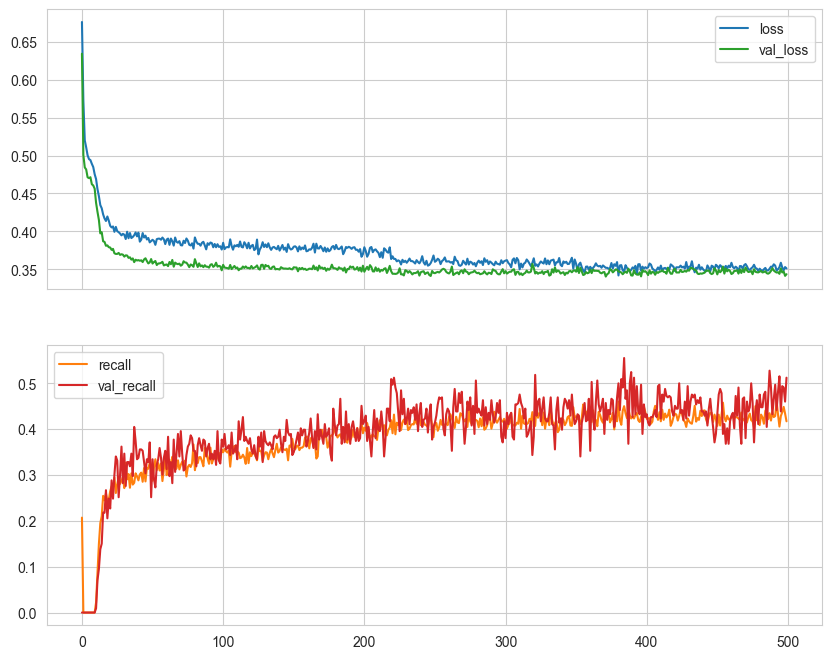

In [127]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [128]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.33786508440971375
recall :  0.44717445969581604


In [129]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1521   72]
 [ 198  209]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.74      0.51      0.61       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [130]:
from tensorflow.keras.callbacks import EarlyStopping

In [131]:
early_stop = EarlyStopping(monitor = "val_loss", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 15, 
                           restore_best_weights = True)


In [132]:
tf.keras.utils.set_random_seed(42)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [133]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=75,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights    
)

Epoch 1/600
86/86 [==============================] - 2s 9ms/step - loss: 0.6941 - recall: 0.9992 - val_loss: 0.7061 - val_recall: 0.9969
Epoch 2/600
86/86 [==============================] - 0s 3ms/step - loss: 0.6892 - recall: 0.9410 - val_loss: 0.7038 - val_recall: 0.9387
Epoch 3/600
86/86 [==============================] - 0s 3ms/step - loss: 0.6806 - recall: 0.8834 - val_loss: 0.7118 - val_recall: 0.8712
Epoch 4/600
86/86 [==============================] - 0s 2ms/step - loss: 0.6612 - recall: 0.8397 - val_loss: 0.7175 - val_recall: 0.7822
Epoch 5/600
86/86 [==============================] - 0s 2ms/step - loss: 0.6412 - recall: 0.7653 - val_loss: 0.6945 - val_recall: 0.6902
Epoch 6/600
86/86 [==============================] - 0s 3ms/step - loss: 0.6261 - recall: 0.7385 - val_loss: 0.6775 - val_recall: 0.6810
Epoch 7/600
86/86 [==============================] - 0s 3ms/step - loss: 0.6115 - recall: 0.7339 - val_loss: 0.6709 - val_recall: 0.6994
Epoch 8/600
86/86 [======================

86/86 [==============================] - 0s 2ms/step - loss: 0.4536 - recall: 0.7684 - val_loss: 0.4716 - val_recall: 0.7362
Epoch 61/600
86/86 [==============================] - 0s 2ms/step - loss: 0.4540 - recall: 0.7592 - val_loss: 0.4646 - val_recall: 0.7209
Epoch 62/600
86/86 [==============================] - 0s 3ms/step - loss: 0.4547 - recall: 0.7600 - val_loss: 0.4860 - val_recall: 0.7546
Epoch 63/600
86/86 [==============================] - 0s 2ms/step - loss: 0.4533 - recall: 0.7684 - val_loss: 0.4632 - val_recall: 0.7178
Epoch 64/600
86/86 [==============================] - 0s 3ms/step - loss: 0.4519 - recall: 0.7584 - val_loss: 0.4991 - val_recall: 0.7607
Epoch 65/600
86/86 [==============================] - 0s 3ms/step - loss: 0.4542 - recall: 0.7730 - val_loss: 0.4339 - val_recall: 0.6626
Epoch 65: early stopping


In [134]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.694,0.999,0.706,0.997
1,0.689,0.941,0.704,0.939
2,0.681,0.883,0.712,0.871
3,0.661,0.840,0.717,0.782
4,0.641,0.765,0.695,0.690


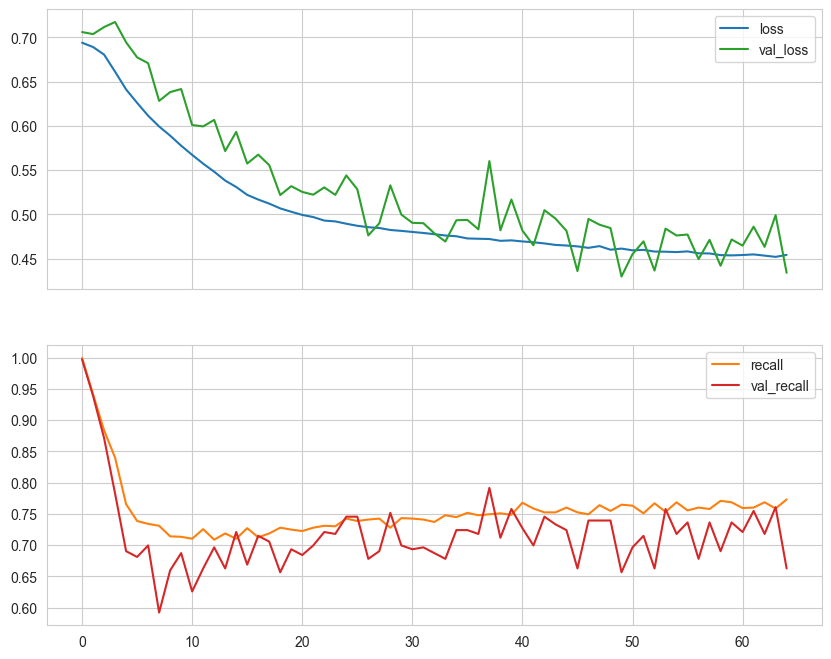

In [135]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [136]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.43065357208251953
recall :  0.44717445969581604


In [137]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1368  225]
 [ 132  275]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1593
           1       0.55      0.68      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000



#### Monitor the "val_recall" as metric

In [138]:
early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 15, 
                           restore_best_weights = True)


In [139]:
tf.keras.utils.set_random_seed(42)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [140]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=75,
    epochs=500,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights    
)

Epoch 1/500
86/86 [==============================] - 2s 6ms/step - loss: 0.6941 - recall: 0.9992 - val_loss: 0.7061 - val_recall: 0.9969
Epoch 2/500
86/86 [==============================] - 0s 3ms/step - loss: 0.6892 - recall: 0.9410 - val_loss: 0.7038 - val_recall: 0.9387
Epoch 3/500
86/86 [==============================] - 0s 3ms/step - loss: 0.6806 - recall: 0.8834 - val_loss: 0.7118 - val_recall: 0.8712
Epoch 4/500
86/86 [==============================] - 0s 3ms/step - loss: 0.6612 - recall: 0.8397 - val_loss: 0.7175 - val_recall: 0.7822
Epoch 5/500
86/86 [==============================] - 0s 3ms/step - loss: 0.6412 - recall: 0.7653 - val_loss: 0.6945 - val_recall: 0.6902
Epoch 6/500
86/86 [==============================] - 0s 2ms/step - loss: 0.6261 - recall: 0.7385 - val_loss: 0.6775 - val_recall: 0.6810
Epoch 7/500
86/86 [==============================] - 0s 3ms/step - loss: 0.6115 - recall: 0.7339 - val_loss: 0.6709 - val_recall: 0.6994
Epoch 8/500
86/86 [======================

In [141]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.694,0.999,0.706,0.997
1,0.689,0.941,0.704,0.939
2,0.681,0.883,0.712,0.871
3,0.661,0.840,0.717,0.782
4,0.641,0.765,0.695,0.690


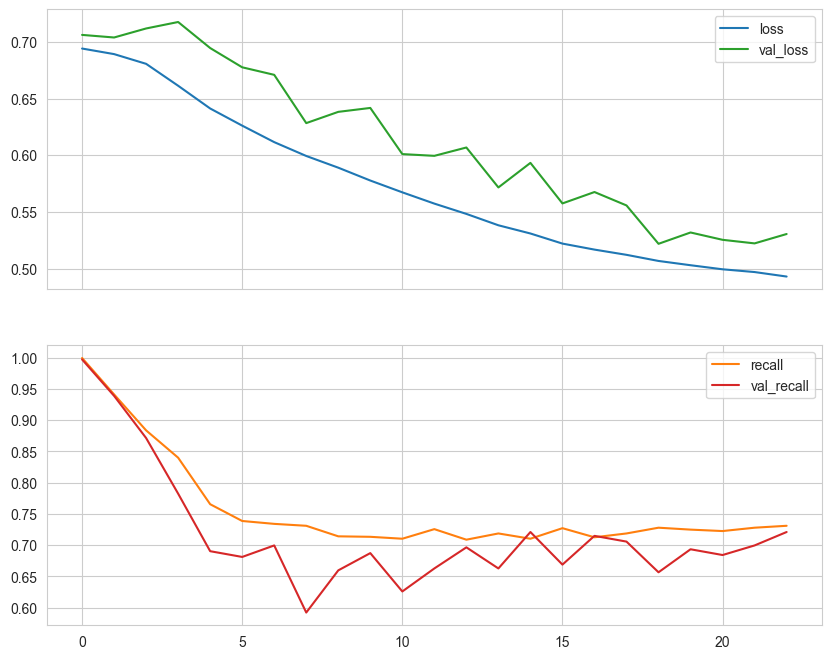

In [142]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [143]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.6230063438415527
recall :  0.44717445969581604


In [144]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1241  352]
 [ 136  271]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1593
           1       0.43      0.67      0.53       407

    accuracy                           0.76      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.81      0.76      0.77      2000



## Optuna

In [145]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [146]:
import optuna
from tensorflow.keras.regularizers import l1, l2, L1L2

In [147]:
early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 15, 
                           restore_best_weights = True)

In [148]:
trial_metric = "Recall"
batch_size = 75

In [150]:
def create_model(trial):
    
    n_units1 = trial.suggest_int("n_units1", 64, 128) 
    n_units2 = trial.suggest_int("n_units2", 16, 64)  
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) 
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    

    tf.keras.utils.set_random_seed(42)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) 
    w1 = trial.suggest_loguniform("w1", 0.01, 2) 
                                                 
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [151]:
study = optuna.create_study(direction="maximize") 
study.optimize(objective, n_trials=15) 
display(study.best_params)

[I 2023-05-17 15:41:32,814] A new study created in memory with name: no-name-e145e065-1688-48c7-8cb6-32d400209633


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:41:39,594] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 110, 'n_units2': 62, 'n_units3': 25, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.005468161337222495, 'regularizer1': 0.00013449991836930232, 'regularizer2': 6.451162145636488e-05, 'dropout': 0.5, 'w0': 2.06867534981072, 'w1': 0.5695301032122317}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:41:46,568] Trial 1 finished with value: 0.9017199277877808 and parameters: {'n_units1': 66, 'n_units2': 56, 'n_units3': 45, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.2532798411709186e-05, 'regularizer1': 0.0005695199844506296, 'regularizer2': 0.0007490666509425557, 'dropout': 0.3, 'w0': 0.058725191898273466, 'w1': 0.022072987816519434}. Best is trial 1 with value: 0.9017199277877808.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:41:54,092] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 64, 'n_units2': 32, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.02095581680014908, 'regularizer1': 0.00024410841751682945, 'regularizer2': 1.3173432293778694e-05, 'dropout': 0.3, 'w0': 0.21521061463467514, 'w1': 0.05313304782272583}. Best is trial 1 with value: 0.9017199277877808.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:42:03,907] Trial 3 finished with value: 1.0 and parameters: {'n_units1': 72, 'n_units2': 57, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.04199323542317706, 'regularizer1': 0.0004252251197465356, 'regularizer2': 0.0005695591766206055, 'dropout': 0.3, 'w0': 0.016349243729596834, 'w1': 0.16278290495522998}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:42:13,206] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 67, 'n_units2': 64, 'n_units3': 58, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.014916629899712373, 'regularizer1': 0.00019806013020712743, 'regularizer2': 2.9047025392025286e-05, 'dropout': 0.5, 'w0': 0.4522981252297182, 'w1': 0.033657501607674105}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 186.
Epoch 201: early stopping


[I 2023-05-17 15:43:13,690] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 69, 'n_units2': 39, 'n_units3': 19, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00041325828767909203, 'regularizer1': 0.0004549562056625618, 'regularizer2': 3.395592409272155e-05, 'dropout': 0.5, 'w0': 2.584874392965544, 'w1': 0.16835464542989909}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:43:25,971] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 122, 'n_units2': 17, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00023782935192986237, 'regularizer1': 1.2227340725844693e-05, 'regularizer2': 1.4601867400193275e-05, 'dropout': 0.5, 'w0': 1.8644705083507342, 'w1': 0.12920750879294168}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-05-17 15:43:39,115] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 86, 'n_units2': 33, 'n_units3': 28, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 3.222011494295765e-05, 'regularizer1': 0.0009187676663969674, 'regularizer2': 3.249240825088199e-05, 'dropout': 0.3, 'w0': 0.0852478555356487, 'w1': 0.14079269774792708}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-05-17 15:43:49,907] Trial 8 finished with value: 0.014742014929652214 and parameters: {'n_units1': 81, 'n_units2': 63, 'n_units3': 49, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 1.4964197482922753e-05, 'regularizer1': 0.0009656168005674622, 'regularizer2': 9.812832953936644e-05, 'dropout': 0, 'w0': 0.4805445076959044, 'w1': 0.03065303187819193}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:43:57,090] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 107, 'n_units2': 44, 'n_units3': 58, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.09603164984045609, 'regularizer1': 0.000295638063790093, 'regularizer2': 0.0008863490115031555, 'dropout': 0, 'w0': 0.6014800642642019, 'w1': 1.3056494037483237}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:44:06,768] Trial 10 finished with value: 0.0 and parameters: {'n_units1': 88, 'n_units2': 50, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0023680101009380785, 'regularizer1': 7.009109290303583e-05, 'regularizer2': 0.0003353782953313042, 'dropout': 0.3, 'w0': 0.010348167179053559, 'w1': 0.010915644217204151}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-05-17 15:44:15,220] Trial 11 finished with value: 0.9828009605407715 and parameters: {'n_units1': 76, 'n_units2': 54, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 8.918036359024387e-05, 'regularizer1': 0.0005631717397608944, 'regularizer2': 0.000948821881198649, 'dropout': 0.3, 'w0': 0.019234584985865284, 'w1': 0.010705161426647129}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-05-17 15:44:24,760] Trial 12 finished with value: 0.0 and parameters: {'n_units1': 78, 'n_units2': 52, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.00011076197634637639, 'regularizer1': 0.00043277968851750175, 'regularizer2': 0.00027434103327856463, 'dropout': 0.3, 'w0': 0.011024013615243895, 'w1': 0.012837049554028257}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 251.
Epoch 266: early stopping


[I 2023-05-17 15:45:47,998] Trial 13 finished with value: 0.009828009642660618 and parameters: {'n_units1': 95, 'n_units2': 45, 'n_units3': 49, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0010601508477449766, 'regularizer1': 8.40253292949613e-05, 'regularizer2': 0.00038879382614718833, 'dropout': 0.3, 'w0': 0.0272555582638536, 'w1': 0.06965440534175074}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:45:54,809] Trial 14 finished with value: 0.9975429773330688 and parameters: {'n_units1': 75, 'n_units2': 57, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00010669848817065832, 'regularizer1': 0.0005300250918907741, 'regularizer2': 0.0009774465335979146, 'dropout': 0.3, 'w0': 0.026525745996619825, 'w1': 0.25712793132636164}. Best is trial 3 with value: 1.0.


{'n_units1': 72,
 'n_units2': 57,
 'n_units3': 42,
 'optimizer': keras.optimizers.adam.Adam,
 'learning_rate': 0.04199323542317706,
 'regularizer1': 0.0004252251197465356,
 'regularizer2': 0.0005695591766206055,
 'dropout': 0.3,
 'w0': 0.016349243729596834,
 'w1': 0.16278290495522998}

In [152]:
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)



In [153]:
tf.keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [154]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=75,
    epochs=700,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/700
86/86 [==============================] - 2s 7ms/step - loss: 0.6312 - recall: 0.0130 - val_loss: 0.5184 - val_recall: 0.0000e+00
Epoch 2/700
86/86 [==============================] - 0s 3ms/step - loss: 0.5281 - recall: 0.0077 - val_loss: 0.5110 - val_recall: 0.0000e+00
Epoch 3/700
86/86 [==============================] - 0s 3ms/step - loss: 0.5195 - recall: 0.0000e+00 - val_loss: 0.5293 - val_recall: 0.0000e+00
Epoch 4/700
86/86 [==============================] - 0s 3ms/step - loss: 0.5213 - recall: 0.0000e+00 - val_loss: 0.5058 - val_recall: 0.0000e+00
Epoch 5/700
86/86 [==============================] - 0s 3ms/step - loss: 0.5195 - recall: 0.0000e+00 - val_loss: 0.5069 - val_recall: 0.0000e+00
Epoch 6/700
86/86 [==============================] - 0s 3ms/step - loss: 0.5283 - recall: 0.0000e+00 - val_loss: 0.4983 - val_recall: 0.0000e+00
Epoch 7/700
86/86 [==============================] - 0s 3ms/step - loss: 0.5215 - recall: 0.0000e+00 - val_loss: 0.5031 - val_recall: 0.00

In [155]:
history = model.history.history

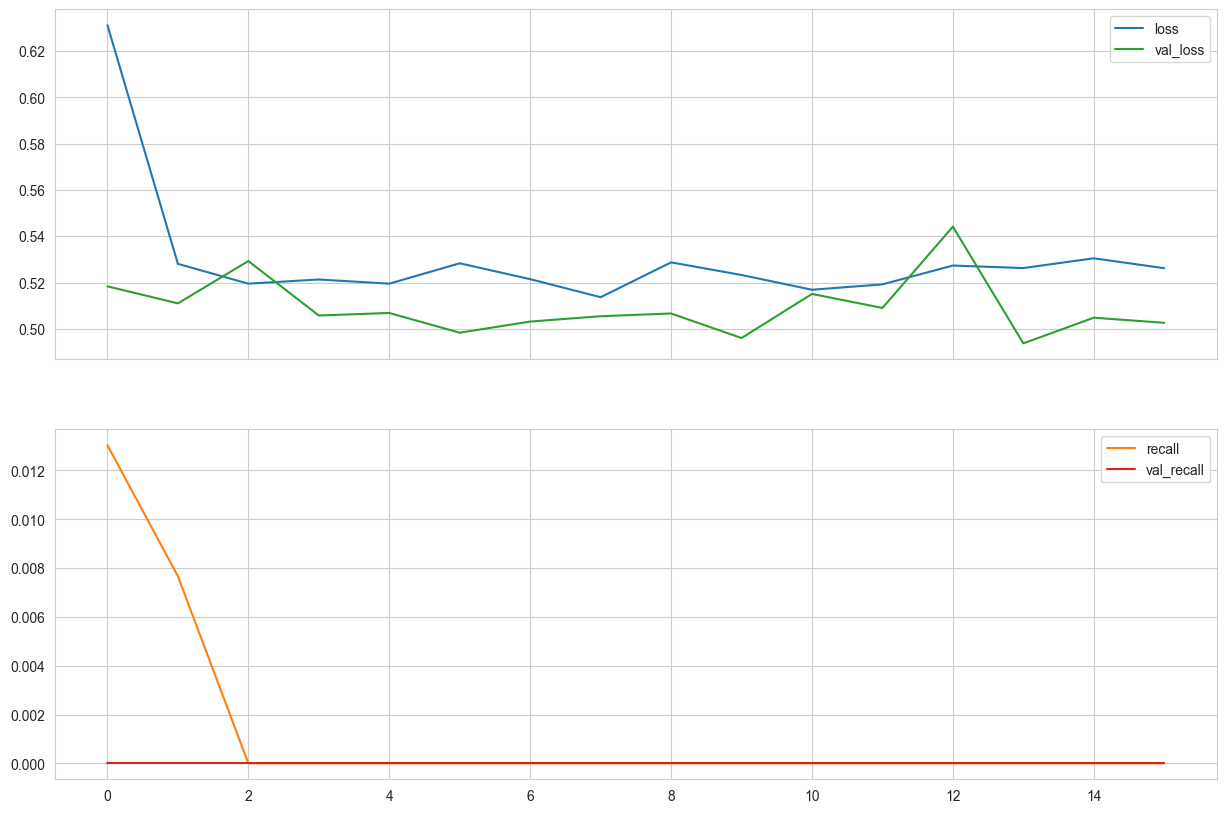

In [156]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [157]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1593    0]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



63/63 [==============================] - 0s 1ms/step


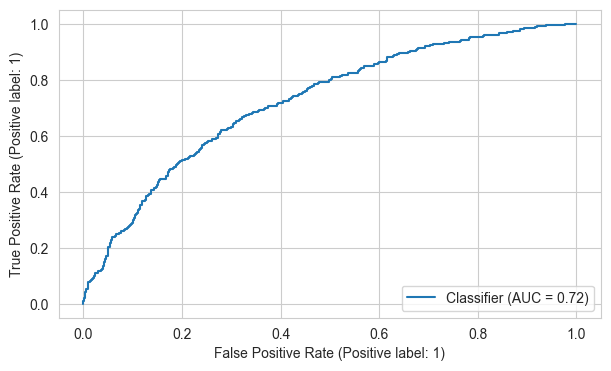

In [158]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [159]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5150901079177856
recall:  0.44717445969581604


In [160]:
roc_auc_score(y_test, y_pred_proba)

0.7227859600740957

# Final Model and Model Deployment

In [161]:
import pickle

pickle.dump(scaler, open("ann_churn", 'wb'))

In [162]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1593    0]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___